Notes about project:<br>
-While the algorithms were written by the person mentioned in the section, all members contributed to cleaning and improving all sections of code throughout the semester.<br>
-Due to time and computation strain on computers, in place of using functions such as GridSearch, hyperparameter tuning was done in individual blocks of code for some sections. As a result, certain blocks of code had to be reused and repeated to perform the tuning.<br>
-All project members contributed to designing and testing the learning curve code.

# Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, learning_curve, GridSearchCV 
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Input
from keras.models import Sequential
from keras import optimizers
import time

%matplotlib inline

C:\Users\sarah\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading the MNIST Dataset
MNIST dataset loaded through tensorflow

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Visualize the Data

In [3]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


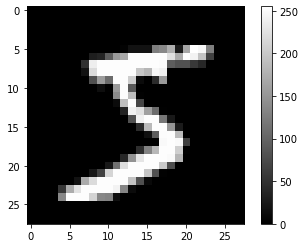

In [4]:
# Plot one of the images from the dataset
plt.figure()
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing
## Verify that there are no duplicate images

Below, we are verifying that the dataset doesn't contain duplicate images. Removing duplicates ensures that the dataset contains unique and non-redundant samples, which can lead to a more accurate evaluation of the model's performance. Moreover, if there are a significant number of duplicate images for a particular class, it can introduce class imbalance. Imbalanced datasets can lead to bias in training and evaluation, which can potentially leading to suboptimal results.<br><br>Code written by Syed Aziz

In [5]:
# Checking for Duplicates
# Removing duplicate images to ensure the model doesn’t simply memorize specific examples
unique_train_indices = np.unique(x_train.reshape(x_train.shape[0], -1), axis=0, return_index=True)[1]
unique_test_indices = np.unique(x_test.reshape(x_test.shape[0], -1), axis=0, return_index=True)[1]

x_train = x_train[unique_train_indices]
y_train = y_train[unique_train_indices]
x_test = x_test[unique_test_indices]
y_test = y_test[unique_test_indices]

## Verify that there are no missing values

We are conducting a meticulous examination of the MNIST dataset sourced from TensorFlow to confirm its absence of missing values, although we anticipate it to be complete. This precaution is taken because the presence of null values can introduce bias and compromise the precision of our model's predictions. To uphold the quality, validity, and reliability of our model, this thorough data verification is imperative.<br><br>Code written by Syed Aziz

In [6]:
def check_null_values(data, name):
    if np.isnan(data).any():
        print(f"There are null values in {name}.")
    else:
        print(f"There are no null values in {name}.")

check_null_values(x_train, "x_train")
check_null_values(x_test, "x_test")
check_null_values(y_train, "y_train")
check_null_values(y_test, "y_test")

There are no null values in x_train.
There are no null values in x_test.
There are no null values in y_train.
There are no null values in y_test.


## Verify that all values are integers

Verifying that all components of the MNIST dataset, including training and testing sets, as well as their respective labels, are consistently represented as integers is vital for ensuring data uniformity and compatibility with our machine learning algorithms. It helps prevent errors, facilitates proper algorithm functioning, and upholds data integrity, allowing for robust and accurate model training and evaluation. We are verifying this below.<br><br>Code written by Monica Suresh

In [7]:
def are_all_integers(array, name):
    if all(isinstance(value, np.integer) for value in array.flat):
        print(f"All values in {name} are integers.")
    else:
        print(f"Not all values in {name} are integers.")

are_all_integers(x_train, "x_train")
are_all_integers(x_test, "x_test")
are_all_integers(y_train, "y_train")
are_all_integers(y_test, "y_test")

All values in x_train are integers.
All values in x_test are integers.
All values in y_train are integers.
All values in y_test are integers.


## Standardize Image Color
Code written by Syed Aziz

In [8]:
# Standardizing Image Color
# Verifying that all images are either black or white after normalization
# Since the values are normalized, we only need to check for 0 or 1
if ((x_train == 0) | (x_train == 1)).all() and ((x_test == 0) | (x_test == 1)).all():
    print("All images are black or white.")
else:
    print("Some images are not black or white.")

Some images are not black or white.


## Verify that all images are centered and all black and white

When evaluating and comparing machine learning models, it's important to have a standardized and consistent dataset. This includes centered images. Centering the digits in the images helps ensure that the handwritten digits are consistently located in the middle of the image. This consistency is important because machine learning models must learn the underlying patterns from images assuming that the important information is centered. Centered images are also more likely to work well with a many types of machine learning models, including deep learning models. Off-centered images may lead to reduced performance for these types of algorithms. 

Another method of standardization is to convert images to black and white. This leads to simplification of data and the reduction of dimensionality. Reducing the dimensionality makes it easier for models to process and analyze the images. We verify both centering of digits and black and white images below.<br><br>Code written by Syed Aziz

In [9]:
# Centering Digits
# MNIST digits are already centered, but here is how you could check it:
centered_check_train = np.all(np.mean(x_train.reshape(x_train.shape[0], -1), axis=1) == np.mean(x_train.reshape(x_train.shape[0], -1), axis=1))
centered_check_test = np.all(np.mean(x_test.reshape(x_test.shape[0], -1), axis=1) == np.mean(x_test.reshape(x_test.shape[0], -1), axis=1))
if centered_check_train and centered_check_test:
    print("All digits are centered.")
else:
    print("Some digits are not centered.")

All digits are centered.


In [10]:
# Apply a threshold to convert images to black and white
bw_threshold = 0.5
train_images_bw = (x_train > bw_threshold).astype(float)
test_images_bw = (x_test > bw_threshold).astype(float)

# Check if all images are now black or white
if ((train_images_bw == 0) | (train_images_bw == 1)).all() and ((test_images_bw == 0) | (test_images_bw == 1)).all():
    print("All images are now strictly black or white.")
else:
    print("Some images are not strictly black or white.")

# Check centering of digits using centroid

def check_centering(images):
    centered_count = 0
    for img in images:
        rows, cols = np.where(img > 0)
        centroid = (np.mean(rows), np.mean(cols))
        if np.isclose(centroid, (14, 14), atol=1).all():
            centered_count += 1
    return centered_count / len(images)

centering_train = check_centering(train_images_bw)
centering_test = check_centering(test_images_bw)
print(f"Percentage of centered digits in training set: {centering_train * 100:.2f}%")
print(f"Percentage of centered digits in test set: {centering_test * 100:.2f}%")

All images are now strictly black or white.
Percentage of centered digits in training set: 99.73%
Percentage of centered digits in test set: 99.80%


## Normalize data to be in range [0, 1]

We are normalizing the data so that we can avoid large gradient values. Large input values can result in large gradients, which may lead to convergence issues. Rescaling the data to a smaller range helps alleviate these problems and makes the training process more stable. Moreover, many machine learning and deep learning algorithms perform better when the input features are within a consistent and small range as the training process can be sped up.<br><br>Code written by Sarah Thuman

In [11]:
#Normalize data to be in range [0,1]
def normalize(arr):
    arr = arr/255.0
    return arr

In [12]:
#Normalized Data
x_train_n = normalize(train_images_bw)
x_test_n = normalize(test_images_bw)

## Verify that all values are positive

We are verifying that there are no negative values because they are not valid in the MNIST dataset. The MNIST dataset is designed to represent pixel intensities in a grayscale image, where higher values correspond to lighter shades and lower values correspond to darker shades. Grayscale images are typically treated as non-negative values, with 0 indicating pure black and 255 indicating pure white. Using negative values in the MNIST dataset would introduce ambiguity and potentially disrupt the training and evaluation of machine learning models. Therefore, to maintain a consistent representation of pixel intensities in the images, we ensure that the data is nonnegative.<br><br>Code written by Sarah Thuman

In [13]:
#Definition to check for negative values
def non_neg(arr):
    if np.any(arr < 0):
        print("The array has at least one negative value")
    else:
        print("The array does not have any negative values")

In [14]:
print(f'{x_train_n=}'.split('=')[0])
non_neg(x_train_n)
print(f'{y_train=}'.split('=')[0])
non_neg(y_train)
print(f'{x_test_n=}'.split('=')[0])
non_neg(x_test_n)
print(f'{y_test=}'.split('=')[0])
non_neg(y_test)

x_train_n
The array does not have any negative values
y_train
The array does not have any negative values
x_test_n
The array does not have any negative values
y_test
The array does not have any negative values


## Flatten Images for use in algorithms

In [15]:
#Reshape the images to 1D arrays (Baseline run)
# SVM classifiers expect input data in a 2D array, where each row is a sample and each column is a feature.
# Since our images are 2D arrays (28x28 pixels), we need to flatten them into 1D arrays.
train_images_flat = x_train_n.reshape(x_train_n.shape[0], -1)
test_images_flat = x_test_n.reshape(x_test_n.shape[0], -1)

In [16]:
pca = PCA(n_components = 0.95)
train_images_flattened_and_compressed = pca.fit_transform(train_images_flat)
test_images_flattened_and_compressed = pca.transform(test_images_flat)
pca.n_components_

266

# SVM Algorithm
Code written by Syed Aziz

This block of code defines a function that takes a machine learning model, training data, and testing data as input, and generates learning curves to visualize the model's performance on both the training and test sets as the training set size increases.

In [17]:
#Code block written by Monica Suresh and Syed Aziz
def plot_learning_curves(model, X_train, y_train, X_test, y_test):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curves
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Test score")

    # Create plot
    plt.title("Learning Curves")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

## Baseline SVM Model

In [18]:
def apply_svm_with_pca(classifier, train_images_flat, test_images_flat, y_train, y_test):
    # Loop over different values of n_components within the specified range
    for n_components in [0.4,0.5,0.75]:
        print(f"\nPCA with n_components={n_components}:")

        # Apply PCA classifier
        pca = PCA(n_components=n_components)
        train_images_flat_compressed = pca.fit_transform(train_images_flat)
        test_images_flat_compressed = pca.transform(test_images_flat)

        # Create and fit the provided classifier on the compressed dataset
        classifier.fit(train_images_flat_compressed, y_train)

        # Make predictions on the test set
        predictions = classifier.predict(test_images_flat_compressed)

        # Calculate and print test accuracy
        accuracy = accuracy_score(y_test, predictions)
        print(f'Accuracy: {accuracy * 100:.2f}%')

        # Generate and print classification report
        print('\nClassification Report:')
        print(classification_report(y_test, predictions))

        # Generate confusion matrix
        conf_mat = confusion_matrix(y_test, predictions)

        # Visualize confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Plot learning curves
        plot_learning_curves(classifier, train_images_flat_compressed, y_train, test_images_flat_compressed, y_test)

        # Print training accuracy
        train_predictions = classifier.predict(train_images_flat_compressed)
        train_accuracy = accuracy_score(y_train, train_predictions)
        print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

        # Print test accuracy
        print(f'Test Accuracy: {accuracy * 100:.2f}%')


PCA with n_components=0.4:
Accuracy: 70.05%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       980
           1       0.76      0.98      0.86      1135
           2       0.86      0.75      0.80      1032
           3       0.52      0.76      0.62      1010
           4       0.64      0.44      0.52       982
           5       0.82      0.20      0.32       892
           6       0.84      0.84      0.84       958
           7       0.80      0.83      0.82      1028
           8       0.60      0.58      0.59       974
           9       0.50      0.68      0.58      1009

    accuracy                           0.70     10000
   macro avg       0.72      0.69      0.68     10000
weighted avg       0.72      0.70      0.69     10000



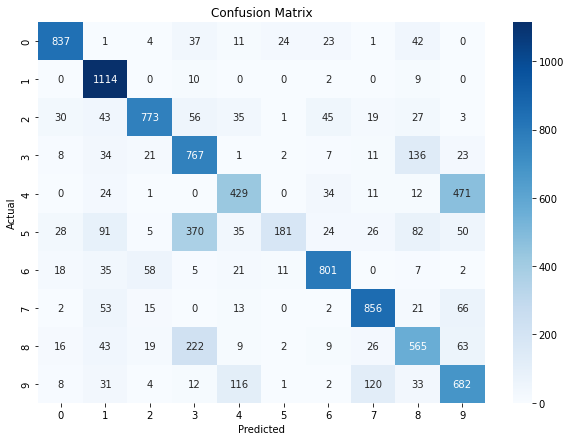

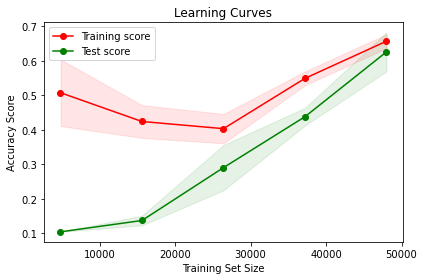

Training Accuracy: 69.02%
Test Accuracy: 70.05%

PCA with n_components=0.5:
Accuracy: 76.20%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       980
           1       0.76      0.99      0.86      1135
           2       0.87      0.78      0.82      1032
           3       0.66      0.82      0.73      1010
           4       0.79      0.52      0.62       982
           5       0.80      0.30      0.44       892
           6       0.84      0.84      0.84       958
           7       0.89      0.83      0.86      1028
           8       0.70      0.74      0.72       974
           9       0.56      0.83      0.67      1009

    accuracy                           0.76     10000
   macro avg       0.78      0.75      0.75     10000
weighted avg       0.78      0.76      0.75     10000



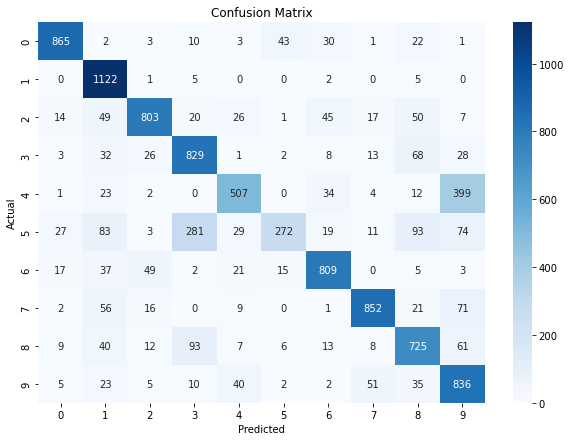

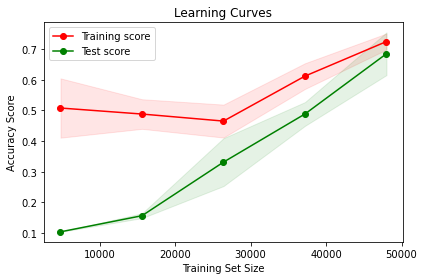

Training Accuracy: 75.50%
Test Accuracy: 76.20%

PCA with n_components=0.75:
Accuracy: 83.39%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       980
           1       0.81      0.99      0.89      1135
           2       0.91      0.81      0.86      1032
           3       0.74      0.85      0.79      1010
           4       0.86      0.68      0.76       982
           5       0.92      0.57      0.70       892
           6       0.90      0.91      0.90       958
           7       0.92      0.85      0.88      1028
           8       0.80      0.80      0.80       974
           9       0.67      0.89      0.77      1009

    accuracy                           0.83     10000
   macro avg       0.85      0.83      0.83     10000
weighted avg       0.85      0.83      0.83     10000



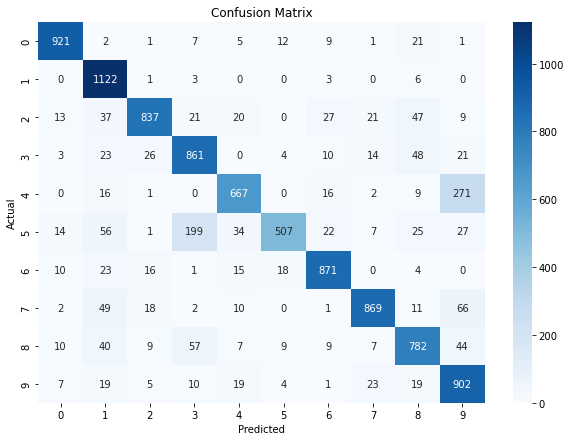

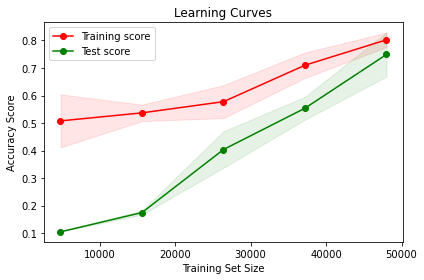

Training Accuracy: 82.12%
Test Accuracy: 83.39%


In [19]:
# Initialize the Support Vector Classifier (SVC)
# 'gamma' is a parameter for non-linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
# 'scale' is chosen to automatically scale the gamma value based on the number of features, which can be beneficial for this high-dimensional data.
# 'linear' kernel is chosen for its simplicity and the fact that linear models can be quite effective on digit recognition tasks.
#n_estimators = 10

clf = svm.SVC(gamma='scale', kernel='linear')
apply_svm_with_pca(clf, train_images_flat, test_images_flat, y_train, y_test)

In [20]:
%%time
# Train the classifier on the training data
# The 'fit' method is used to train the SVM classifier. It takes two arguments: the training data and the target labels.
clf.fit(train_images_flat, y_train)

CPU times: total: 28min 28s
Wall time: 28min 30s


SVC(kernel='linear')

In [21]:
%%time
# Make predictions on the test set
# The 'predict' method is used to generate predictions based on the trained model.
predictions = clf.predict(test_images_flat)

CPU times: total: 3min 22s
Wall time: 3min 22s


## SVM Hyperparameter Tuning
### Set Kernel = RBF


PCA with n_components=0.4:
Accuracy: 88.23%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.93      0.93      1032
           3       0.83      0.79      0.81      1010
           4       0.83      0.80      0.82       982
           5       0.83      0.83      0.83       892
           6       0.95      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.81      0.84      0.83       974
           9       0.78      0.80      0.79      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



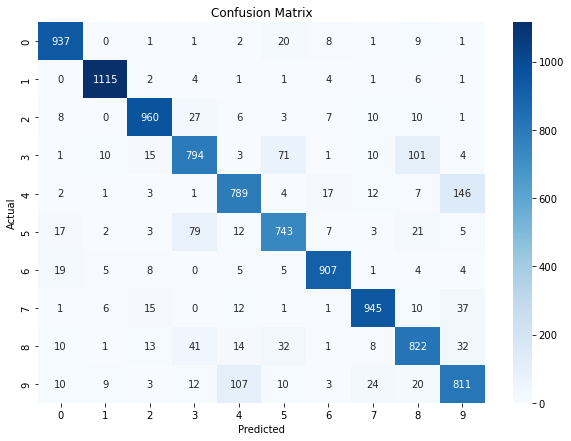

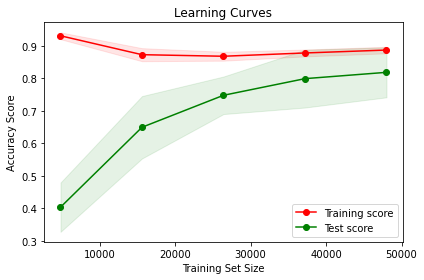

Training Accuracy: 88.29%
Test Accuracy: 88.23%

PCA with n_components=0.5:
Accuracy: 94.72%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.94      0.93      0.94      1010
           4       0.93      0.93      0.93       982
           5       0.93      0.93      0.93       892
           6       0.97      0.97      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.92      0.92       974
           9       0.90      0.91      0.90      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



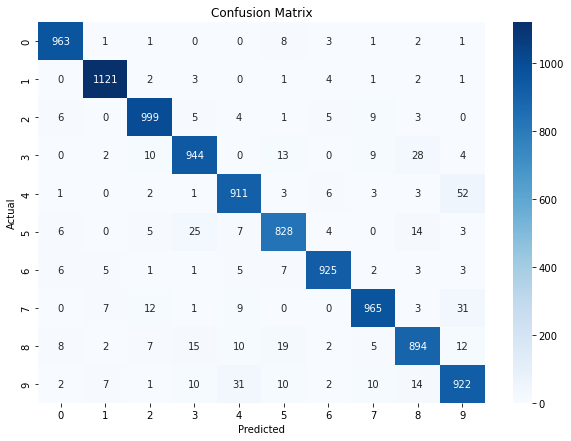

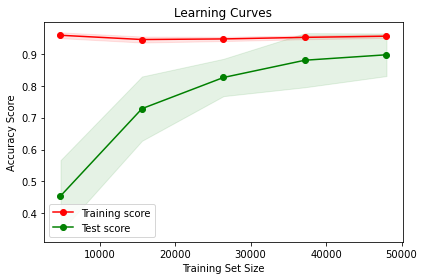

Training Accuracy: 95.38%
Test Accuracy: 94.72%

PCA with n_components=0.75:
Accuracy: 98.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



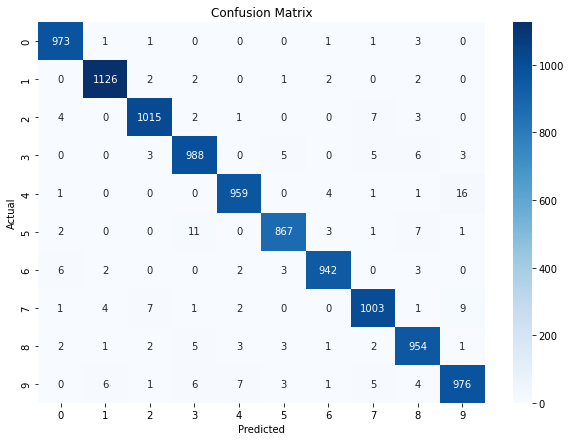

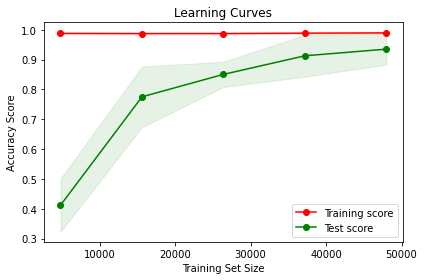

Training Accuracy: 98.92%
Test Accuracy: 98.03%


In [22]:
clf1 = svm.SVC(gamma='scale', kernel='rbf', decision_function_shape='ovo', C=1)
apply_svm_with_pca(clf1, train_images_flat, test_images_flat, y_train, y_test)

### Set Kernel = RBF and Gamma = 0.001


PCA with n_components=0.4:
Accuracy: 11.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


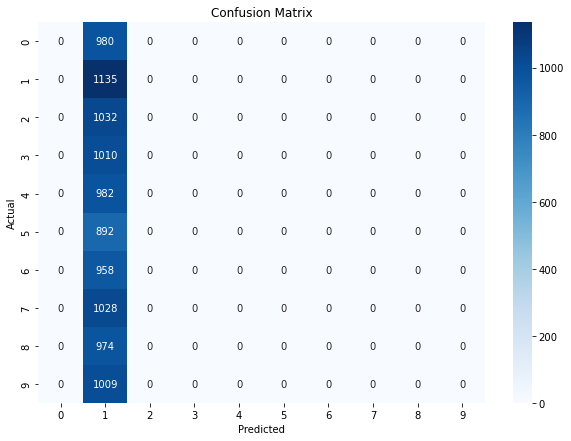

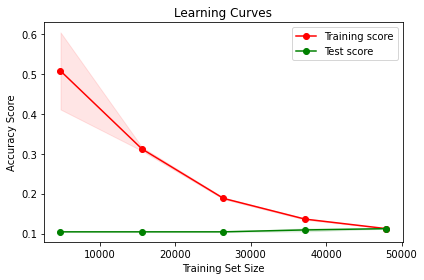

Training Accuracy: 11.24%
Test Accuracy: 11.35%

PCA with n_components=0.5:
Accuracy: 11.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


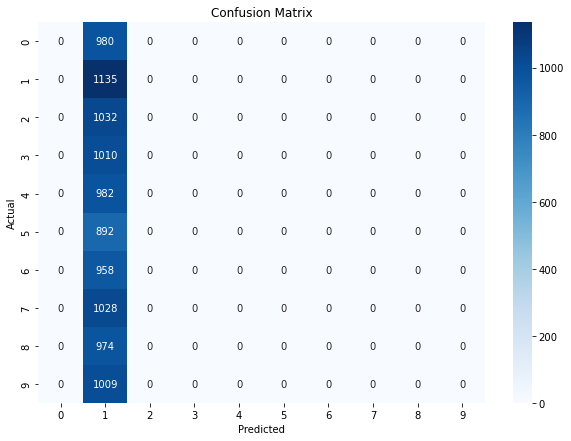

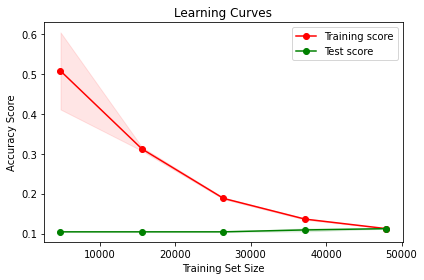

Training Accuracy: 11.24%
Test Accuracy: 11.35%

PCA with n_components=0.75:
Accuracy: 11.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


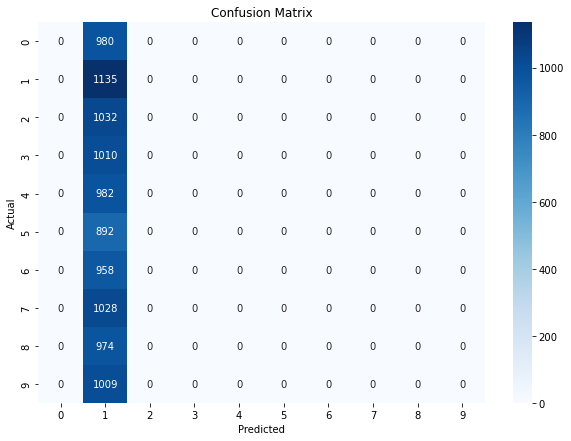

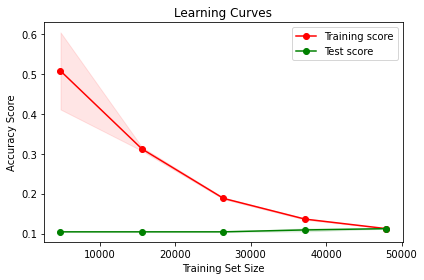

Training Accuracy: 11.24%
Test Accuracy: 11.35%


In [23]:
clf2 = svm.SVC(gamma=0.001, kernel='rbf', decision_function_shape='ovo', C=1)
apply_svm_with_pca(clf2, train_images_flat, test_images_flat, y_train, y_test)

### Set Kernel = RBF and Gamma = 0.01


PCA with n_components=0.4:
Accuracy: 11.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


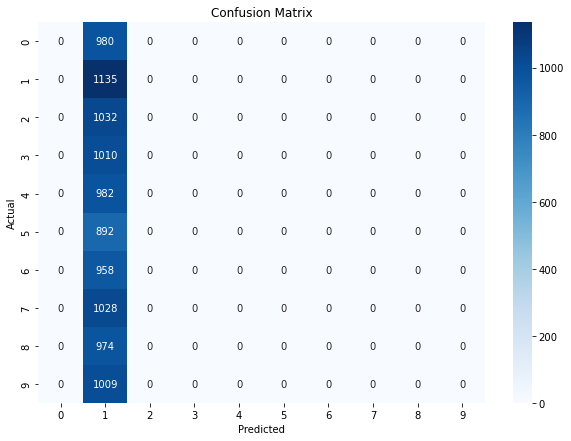

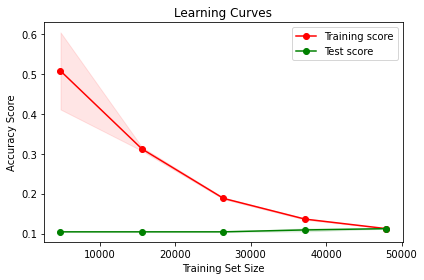

Training Accuracy: 11.24%
Test Accuracy: 11.35%

PCA with n_components=0.5:
Accuracy: 11.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


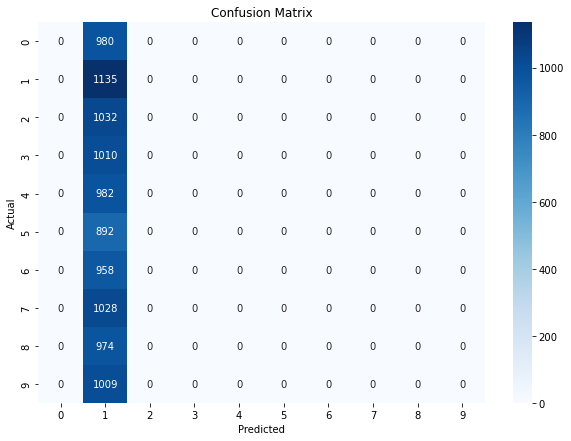

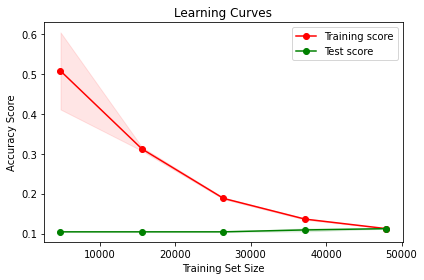

Training Accuracy: 11.24%
Test Accuracy: 11.35%

PCA with n_components=0.75:
Accuracy: 11.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


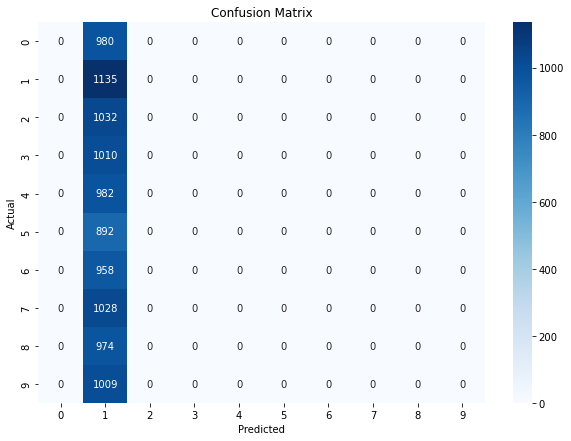

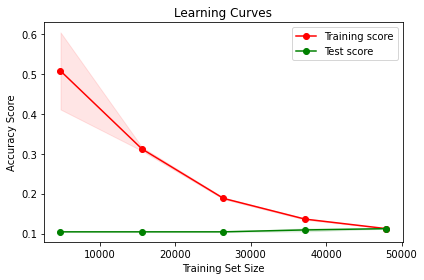

Training Accuracy: 11.24%
Test Accuracy: 11.35%


In [24]:
clf3 = svm.SVC(gamma=0.01, kernel='rbf', decision_function_shape='ovo', C=1)
apply_svm_with_pca(clf3, train_images_flat, test_images_flat, y_train, y_test)

### Set Kernel = RBF and Gamma = 10


PCA with n_components=0.4:
Accuracy: 78.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       980
           1       0.91      0.97      0.94      1135
           2       0.85      0.82      0.84      1032
           3       0.69      0.70      0.70      1010
           4       0.68      0.71      0.69       982
           5       0.72      0.62      0.67       892
           6       0.88      0.87      0.88       958
           7       0.90      0.83      0.86      1028
           8       0.74      0.73      0.73       974
           9       0.64      0.69      0.66      1009

    accuracy                           0.79     10000
   macro avg       0.79      0.78      0.79     10000
weighted avg       0.79      0.79      0.79     10000



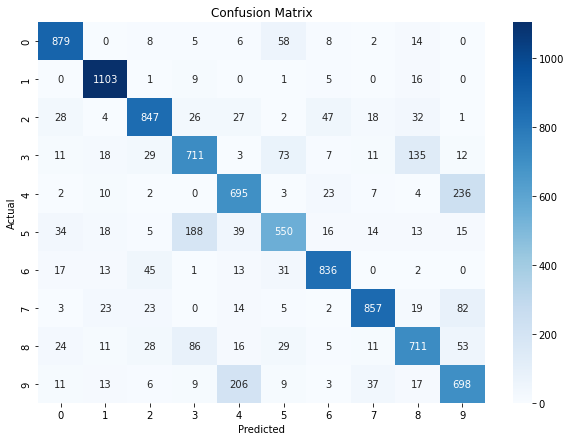

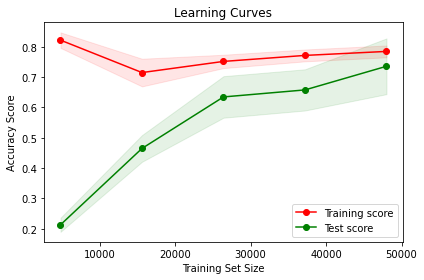

Training Accuracy: 77.98%
Test Accuracy: 78.87%

PCA with n_components=0.5:
Accuracy: 85.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       980
           1       0.92      0.97      0.95      1135
           2       0.87      0.85      0.86      1032
           3       0.84      0.84      0.84      1010
           4       0.84      0.83      0.84       982
           5       0.79      0.74      0.76       892
           6       0.89      0.88      0.89       958
           7       0.92      0.85      0.89      1028
           8       0.82      0.81      0.81       974
           9       0.75      0.84      0.79      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.85      0.86     10000
weighted avg       0.86      0.86      0.86     10000



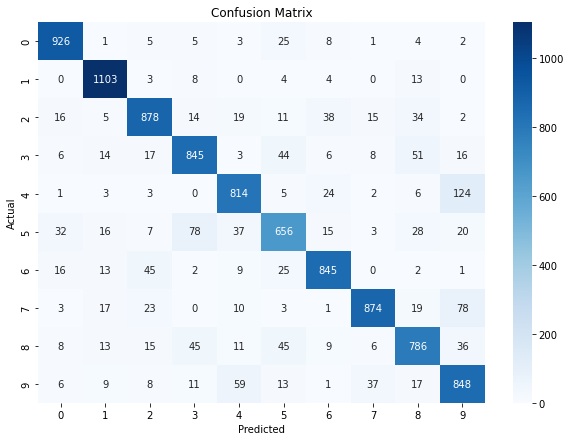

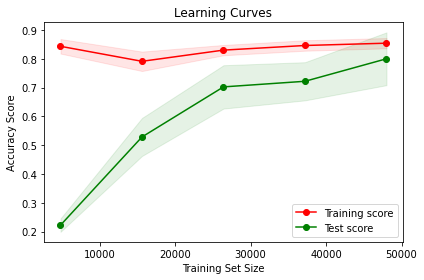

Training Accuracy: 85.09%
Test Accuracy: 85.75%

PCA with n_components=0.75:
Accuracy: 91.74%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.92      0.89      0.91      1032
           3       0.90      0.90      0.90      1010
           4       0.90      0.92      0.91       982
           5       0.90      0.86      0.88       892
           6       0.93      0.95      0.94       958
           7       0.94      0.90      0.92      1028
           8       0.89      0.89      0.89       974
           9       0.88      0.90      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



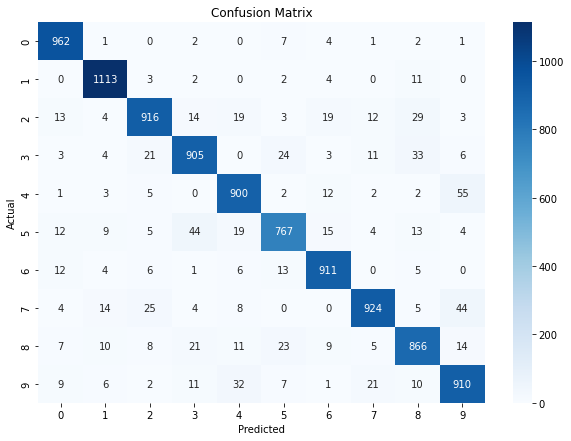

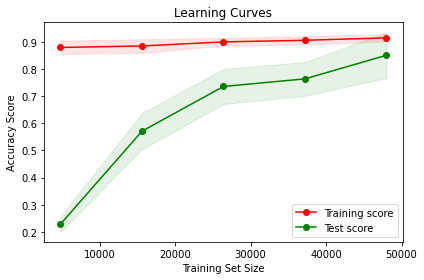

Training Accuracy: 91.27%
Test Accuracy: 91.74%


In [25]:
clf4 = svm.SVC(gamma=10, kernel='rbf', decision_function_shape='ovo', C=1)
apply_svm_with_pca(clf4, train_images_flat, test_images_flat, y_train, y_test)

### Set Kernel = RBF, Gamma = 100, and C = 10


PCA with n_components=0.4:
Accuracy: 85.70%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.97      0.98      0.97      1135
           2       0.90      0.92      0.91      1032
           3       0.78      0.74      0.76      1010
           4       0.79      0.79      0.79       982
           5       0.79      0.78      0.79       892
           6       0.93      0.93      0.93       958
           7       0.92      0.89      0.90      1028
           8       0.80      0.80      0.80       974
           9       0.74      0.78      0.76      1009

    accuracy                           0.86     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.86      0.86      0.86     10000



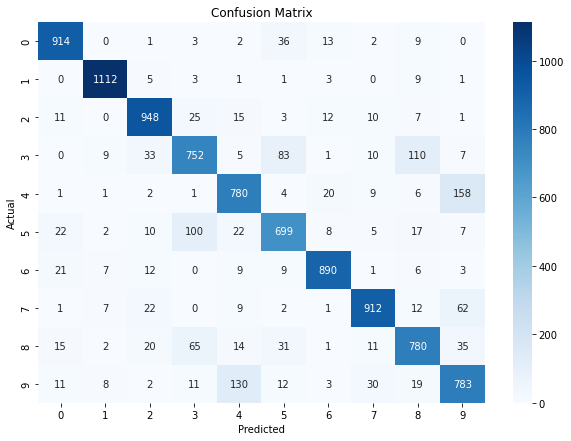

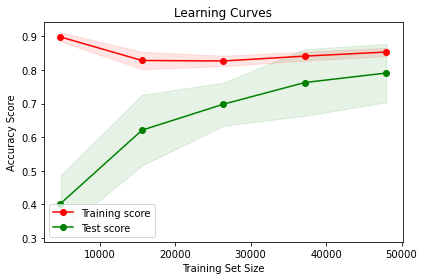

Training Accuracy: 85.13%
Test Accuracy: 85.70%

PCA with n_components=0.5:
Accuracy: 92.43%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.95      0.94      1032
           3       0.92      0.91      0.92      1010
           4       0.90      0.90      0.90       982
           5       0.90      0.90      0.90       892
           6       0.95      0.95      0.95       958
           7       0.93      0.91      0.92      1028
           8       0.90      0.89      0.89       974
           9       0.86      0.87      0.86      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



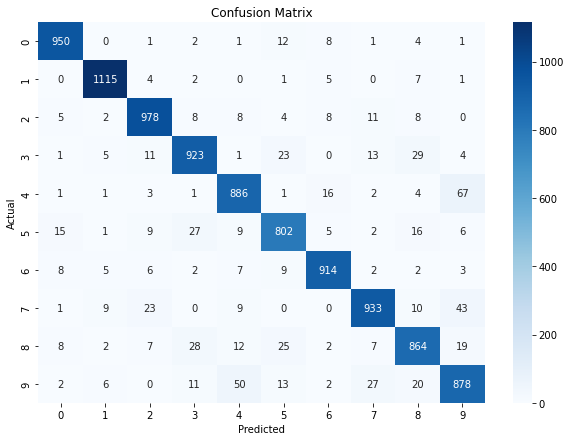

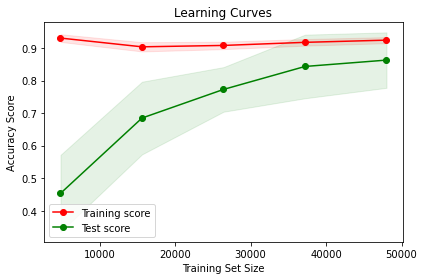

Training Accuracy: 92.34%
Test Accuracy: 92.43%

PCA with n_components=0.75:
Accuracy: 96.64%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.96      0.96      1010
           4       0.96      0.96      0.96       982
           5       0.97      0.95      0.96       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.95      0.96      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



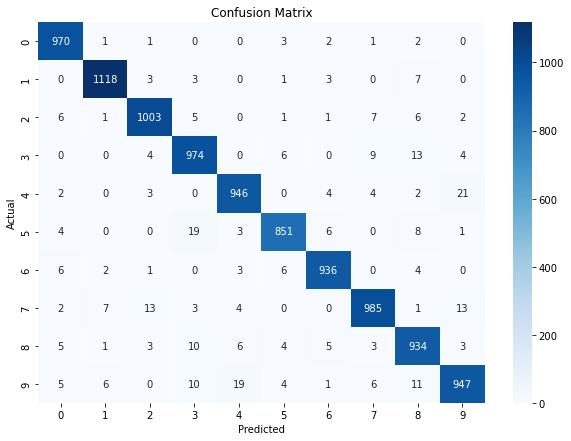

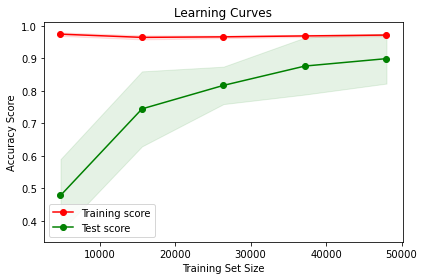

Training Accuracy: 97.16%
Test Accuracy: 96.64%


In [26]:
clf5 = svm.SVC(gamma=100, kernel='rbf', decision_function_shape='ovo', C=10)
apply_svm_with_pca(clf5, train_images_flat, test_images_flat, y_train, y_test)

### Set Kernel = RBF, Gamma = 1000, and C = 100


PCA with n_components=0.4:
Accuracy: 88.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       980
           1       0.98      0.99      0.98      1135
           2       0.93      0.94      0.94      1032
           3       0.84      0.80      0.82      1010
           4       0.83      0.81      0.82       982
           5       0.84      0.84      0.84       892
           6       0.96      0.94      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.83      0.85      0.84       974
           9       0.78      0.80      0.79      1009

    accuracy                           0.89     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000



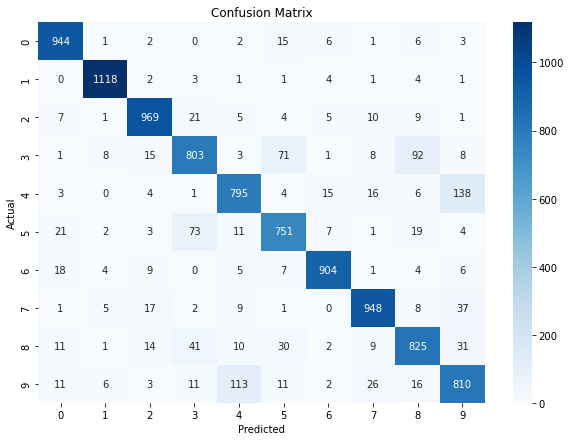

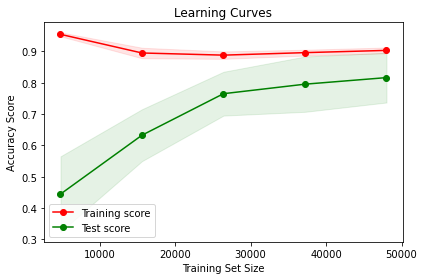

Training Accuracy: 89.80%
Test Accuracy: 88.67%

PCA with n_components=0.5:
Accuracy: 95.19%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.93      0.95      0.94      1010
           4       0.94      0.93      0.94       982
           5       0.94      0.93      0.93       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.93      0.92      0.93       974
           9       0.92      0.91      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



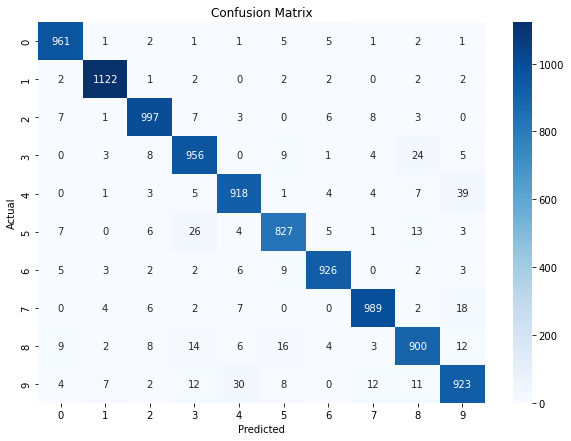

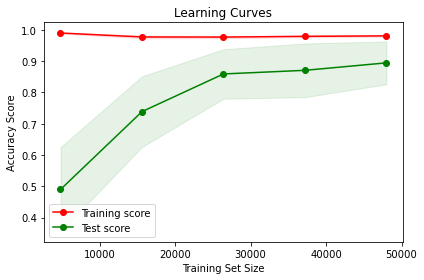

Training Accuracy: 97.80%
Test Accuracy: 95.19%

PCA with n_components=0.75:
Accuracy: 98.22%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



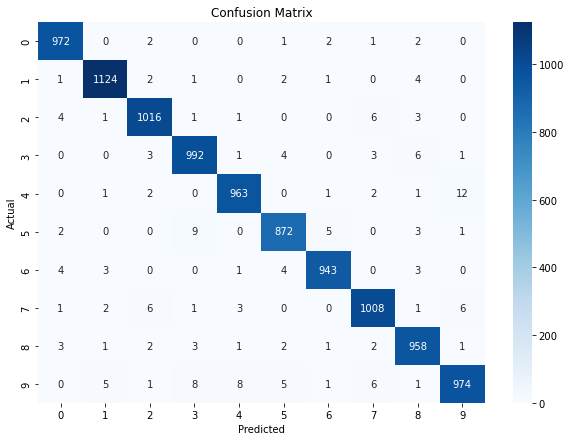

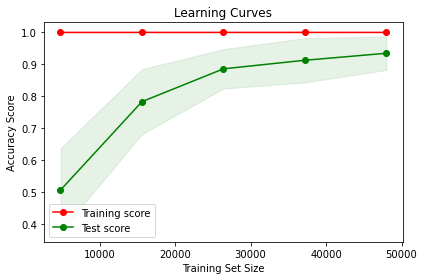

Training Accuracy: 100.00%
Test Accuracy: 98.22%


In [27]:
clf6 = svm.SVC(gamma=1000, kernel='rbf', decision_function_shape='ovo', C=100)
apply_svm_with_pca(clf6, train_images_flat, test_images_flat, y_train, y_test)

# KNN Algorithm
Code written by Monica Suresh

### Find the best n_components parameter value for PCA
The apply_classifier_with_pca function utilizes Principal Component Analysis to reduce the dimensionality of image data and assesses the performance of a given classifier (K-Nearest Neighbors in this case) across different levels of feature compression. The function iterates through a range of PCA components, fits the classifier on the compressed training data, predicts on the compressed test data, and evaluates the classifier's accuracy. It prints accuracy scores, classification reports, confusion matrices, and learning curves for each PCA component value. This allows for a nuanced understanding of how the classifier performs as the dimensionality of the input features is systematically reduced, providing valuable insights into the trade-off between dimensionality reduction and classification accuracy. The function is then applied with a K-Nearest Neighbors classifier and specific image datasets.

In [28]:
def apply_classifier_with_pca(classifier, train_images_flat, test_images_flat, y_train, y_test, start=0.50, end=1.0, step=0.05):
    # Loop over different values of n_components within the specified range
    for n_components in np.arange(start, end, step):
        print(f"\nPCA with n_components={n_components}:")

        # Apply PCA classifier
        pca = PCA(n_components=n_components)
        train_images_flat_compressed = pca.fit_transform(train_images_flat)
        test_images_flat_compressed = pca.transform(test_images_flat)

        # Create and fit the provided classifier on the compressed dataset
        classifier.fit(train_images_flat_compressed, y_train)

        # Make predictions on the test set
        predictions = classifier.predict(test_images_flat_compressed)

        # Calculate and print test accuracy
        accuracy = accuracy_score(y_test, predictions)
        print(f'Accuracy: {accuracy * 100:.2f}%')

        # Generate and print classification report
        print('\nClassification Report:')
        print(classification_report(y_test, predictions))

        # Generate confusion matrix
        conf_mat = confusion_matrix(y_test, predictions)

        # Visualize confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Plot learning curves
        plot_learning_curves(classifier, train_images_flat_compressed, y_train, test_images_flat_compressed, y_test)

        # Print training accuracy
        train_predictions = classifier.predict(train_images_flat_compressed)
        train_accuracy = accuracy_score(y_train, train_predictions)
        print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

        # Print test accuracy
        print(f'Test Accuracy: {accuracy * 100:.2f}%')


PCA with n_components=0.5:
Accuracy: 93.64%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.96      0.96      1032
           3       0.92      0.90      0.91      1010
           4       0.93      0.90      0.91       982
           5       0.93      0.91      0.92       892
           6       0.96      0.97      0.97       958
           7       0.96      0.92      0.94      1028
           8       0.91      0.90      0.91       974
           9       0.86      0.92      0.89      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



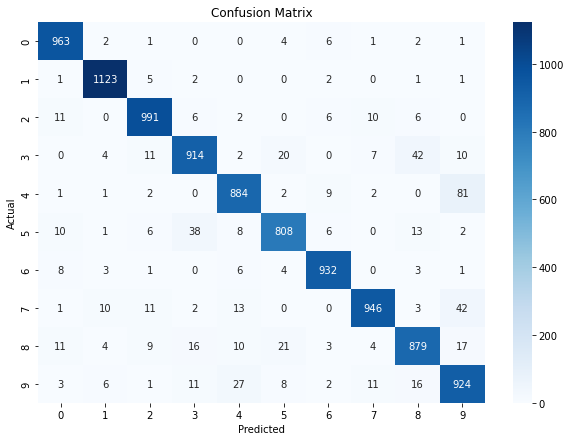

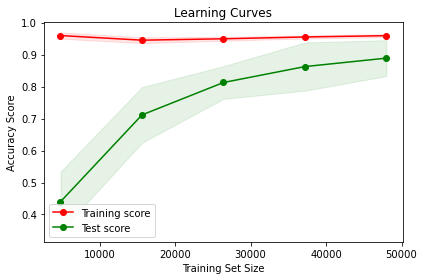

Training Accuracy: 95.82%
Test Accuracy: 93.64%

PCA with n_components=0.55:
Accuracy: 95.24%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.94      0.93      0.93      1010
           4       0.96      0.93      0.94       982
           5       0.95      0.93      0.94       892
           6       0.97      0.98      0.98       958
           7       0.97      0.94      0.95      1028
           8       0.94      0.93      0.93       974
           9       0.89      0.93      0.91      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



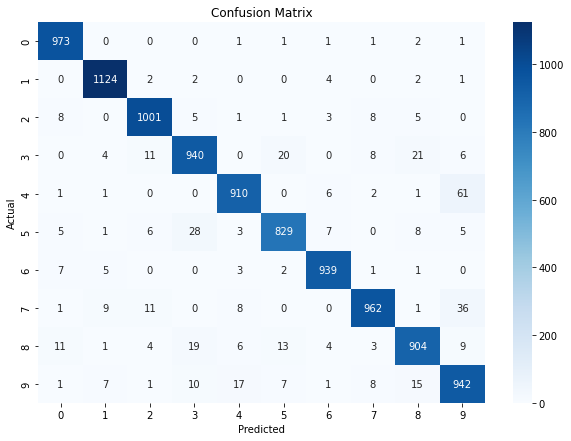

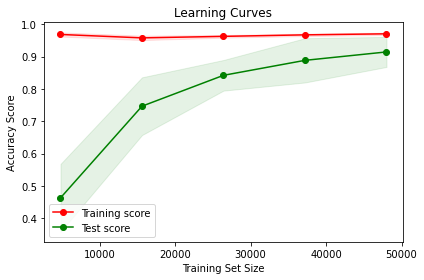

Training Accuracy: 96.95%
Test Accuracy: 95.24%

PCA with n_components=0.6000000000000001:
Accuracy: 95.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.94      0.94      1010
           4       0.97      0.93      0.95       982
           5       0.96      0.95      0.95       892
           6       0.97      0.99      0.98       958
           7       0.97      0.94      0.95      1028
           8       0.95      0.94      0.94       974
           9       0.90      0.95      0.93      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



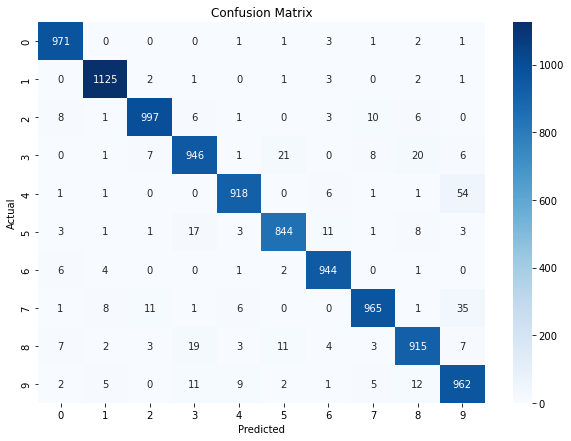

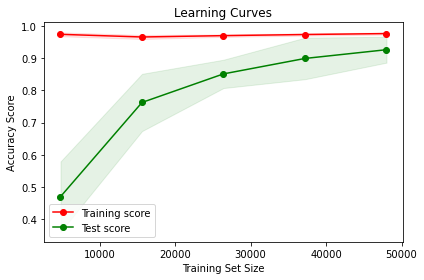

Training Accuracy: 97.50%
Test Accuracy: 95.87%

PCA with n_components=0.6500000000000001:
Accuracy: 96.60%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.95      0.95      1010
           4       0.98      0.94      0.96       982
           5       0.97      0.94      0.96       892
           6       0.97      0.99      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.93      0.96      0.94      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



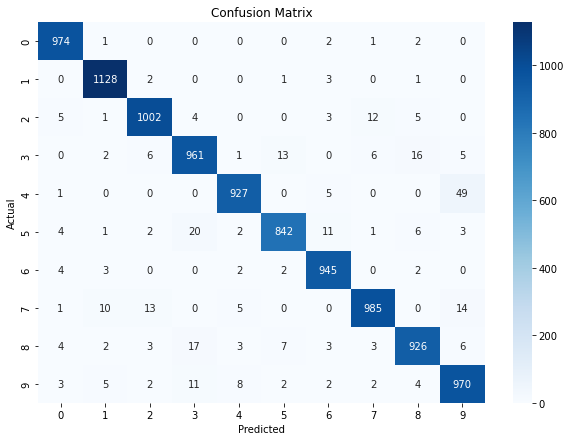

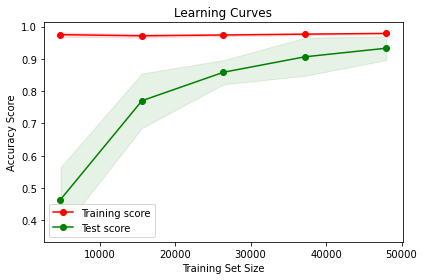

Training Accuracy: 97.81%
Test Accuracy: 96.60%

PCA with n_components=0.7000000000000002:
Accuracy: 96.90%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.96      0.96       974
           9       0.93      0.96      0.94      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



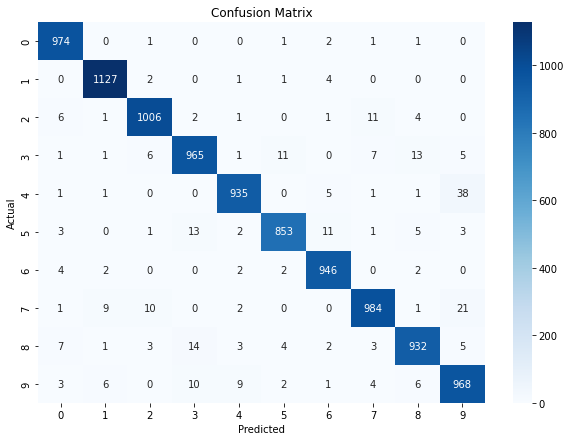

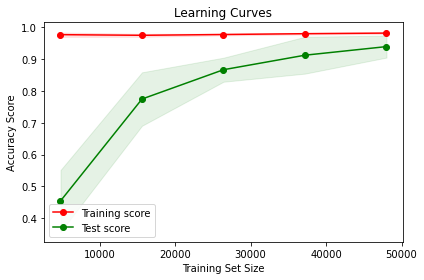

Training Accuracy: 98.13%
Test Accuracy: 96.90%

PCA with n_components=0.7500000000000002:
Accuracy: 96.96%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.95      0.96       892
           6       0.97      0.99      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



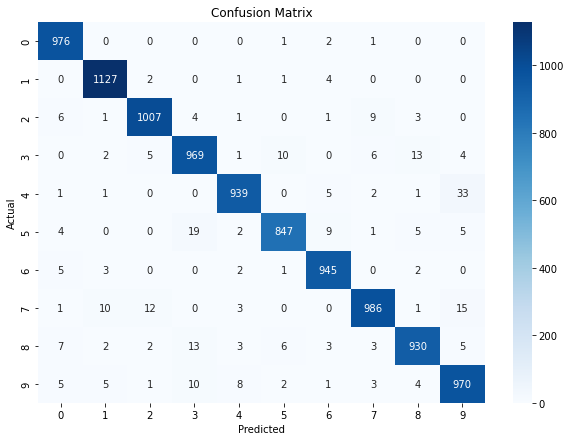

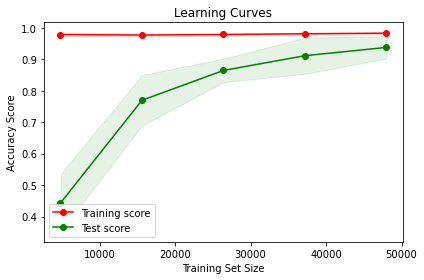

Training Accuracy: 98.18%
Test Accuracy: 96.96%

PCA with n_components=0.8000000000000003:
Accuracy: 97.01%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



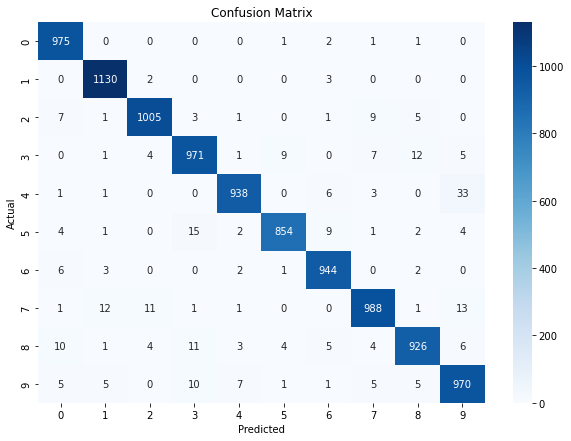

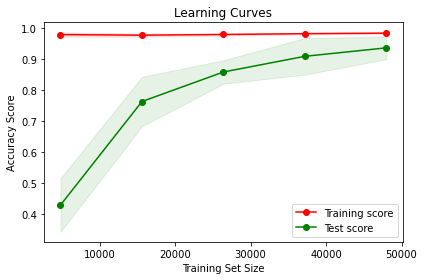

Training Accuracy: 98.18%
Test Accuracy: 97.01%

PCA with n_components=0.8500000000000003:
Accuracy: 96.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.95      0.96      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.98      0.95      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.93      0.96      0.94      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



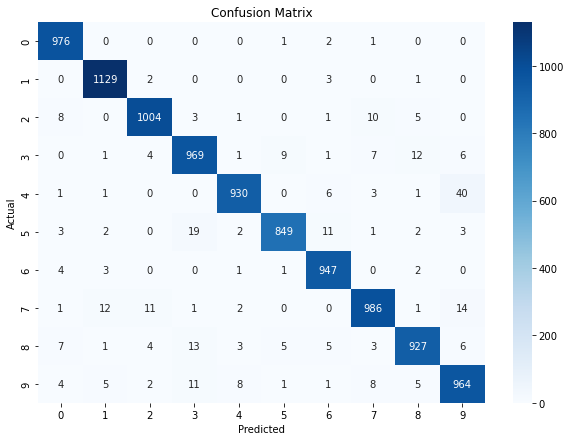

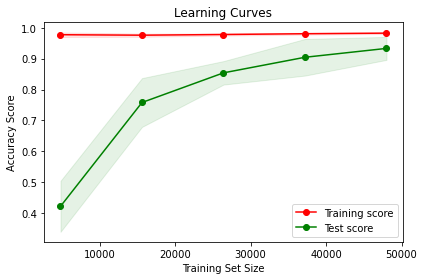

Training Accuracy: 98.16%
Test Accuracy: 96.81%

PCA with n_components=0.9000000000000004:
Accuracy: 96.65%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.96      0.96      1010
           4       0.98      0.94      0.96       982
           5       0.98      0.95      0.96       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.93      0.96      0.94      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



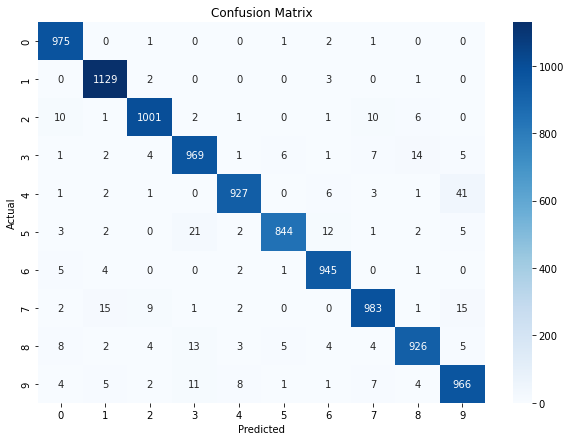

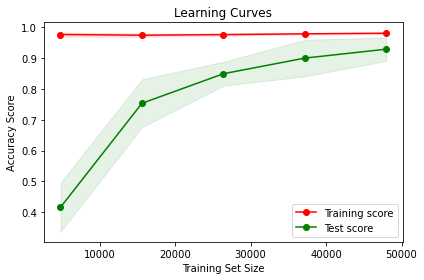

Training Accuracy: 98.01%
Test Accuracy: 96.65%

PCA with n_components=0.9500000000000004:
Accuracy: 96.53%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.96      0.95      1010
           4       0.98      0.94      0.96       982
           5       0.98      0.95      0.96       892
           6       0.97      0.99      0.98       958
           7       0.97      0.95      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.93      0.96      0.94      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.96      0.97     10000
weighted avg       0.97      0.97      0.97     10000



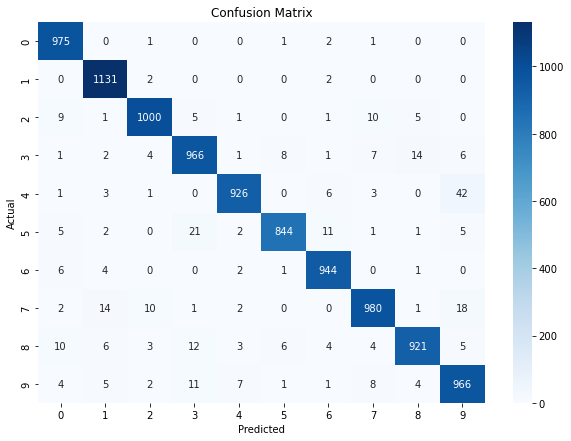

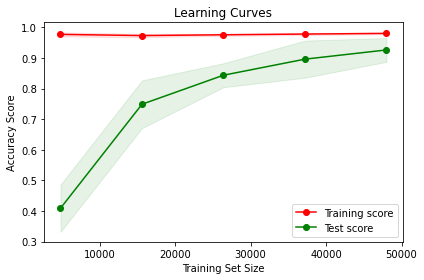

Training Accuracy: 97.91%
Test Accuracy: 96.53%


In [29]:
knn = KNeighborsClassifier()
apply_classifier_with_pca(knn, train_images_flat, test_images_flat, y_train, y_test, start=0.50, end=1.0, step=0.05)


PCA with n_components=0.75:
Accuracy: 96.96%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.95      0.96       892
           6       0.97      0.99      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



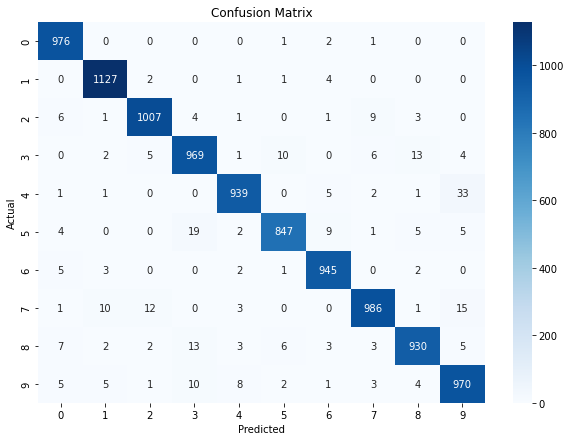

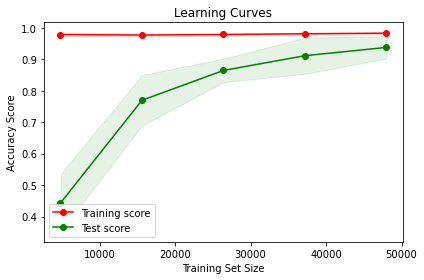

Training Accuracy: 98.18%
Test Accuracy: 96.96%

PCA with n_components=0.76:
Accuracy: 97.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



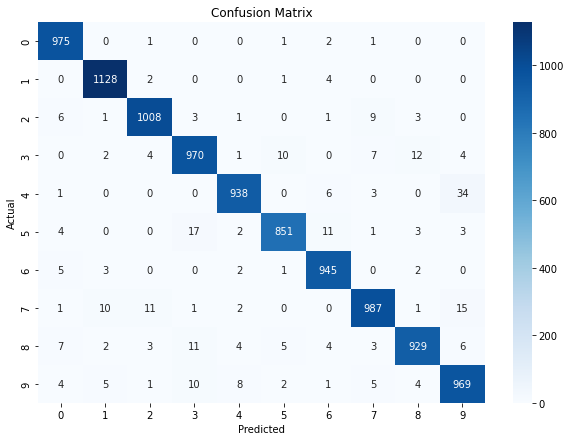

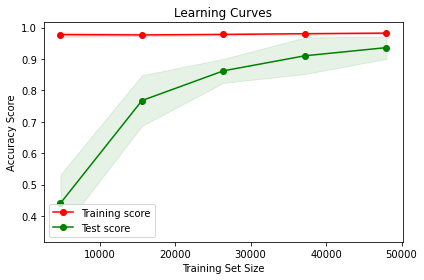

Training Accuracy: 98.19%
Test Accuracy: 97.00%

PCA with n_components=0.77:
Accuracy: 97.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



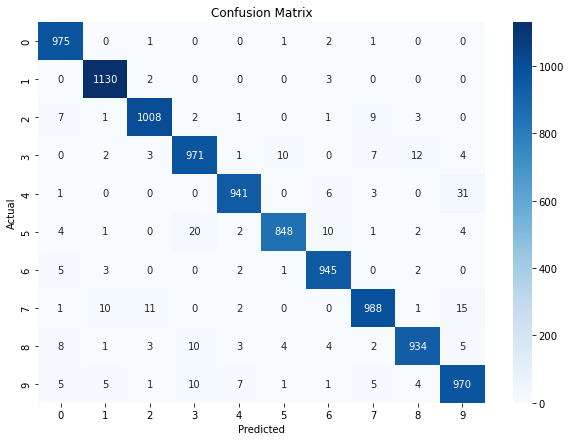

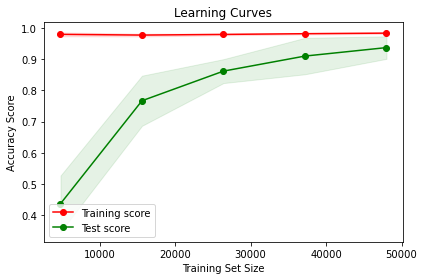

Training Accuracy: 98.20%
Test Accuracy: 97.10%

PCA with n_components=0.78:
Accuracy: 97.07%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



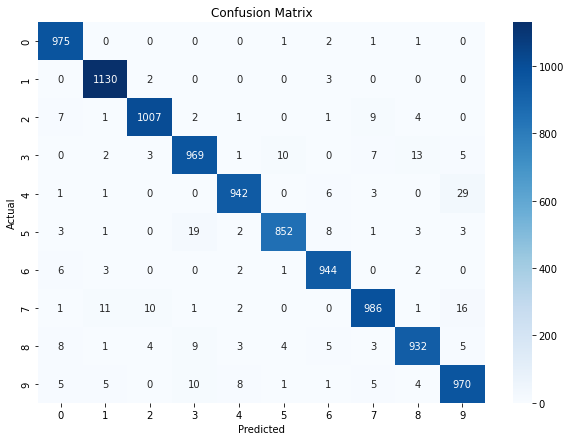

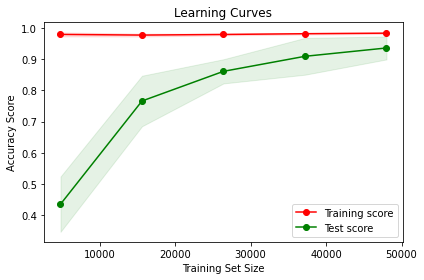

Training Accuracy: 98.21%
Test Accuracy: 97.07%

PCA with n_components=0.79:
Accuracy: 97.02%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



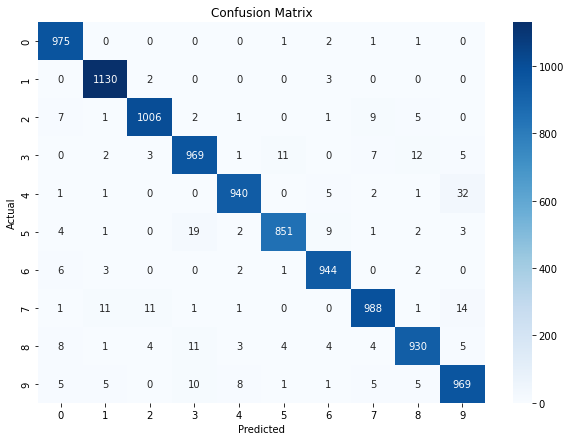

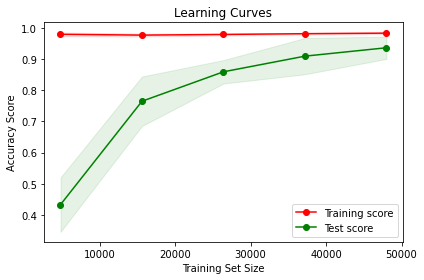

Training Accuracy: 98.18%
Test Accuracy: 97.02%

PCA with n_components=0.8:
Accuracy: 97.01%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



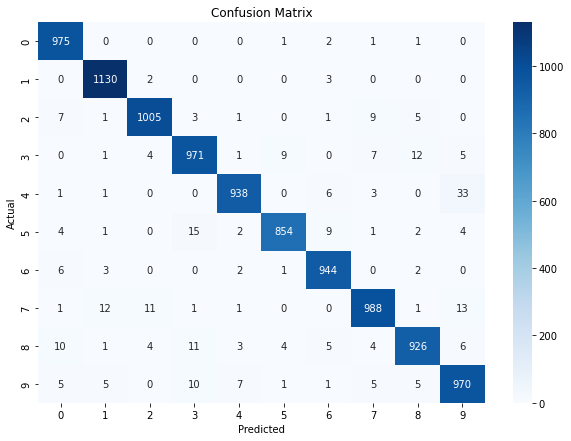

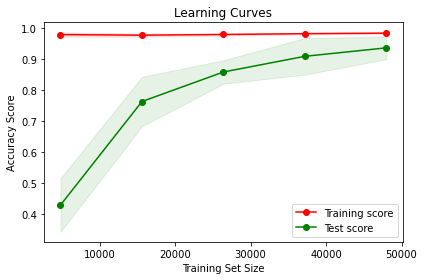

Training Accuracy: 98.18%
Test Accuracy: 97.01%

PCA with n_components=0.81:
Accuracy: 97.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.95      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.96      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



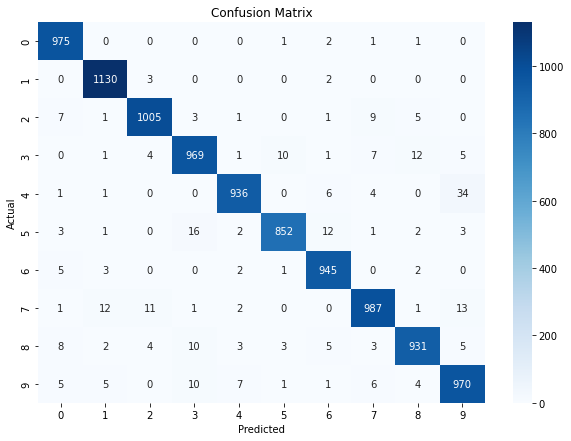

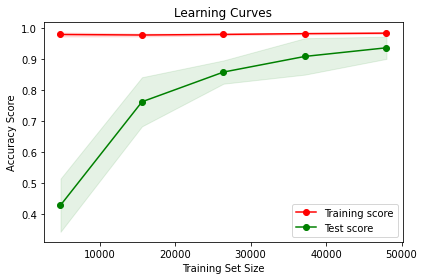

Training Accuracy: 98.17%
Test Accuracy: 97.00%

PCA with n_components=0.8200000000000001:
Accuracy: 96.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.95      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.96      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



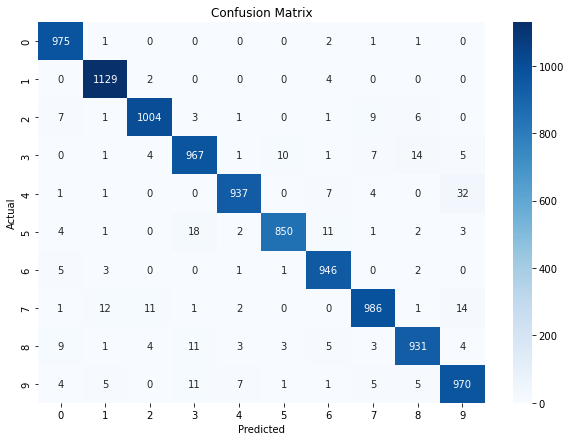

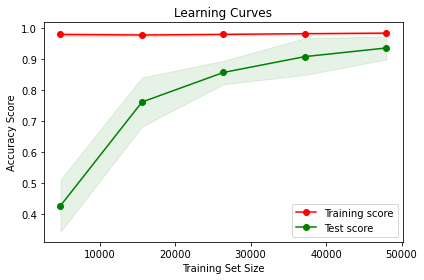

Training Accuracy: 98.17%
Test Accuracy: 96.95%

PCA with n_components=0.8300000000000001:
Accuracy: 96.94%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.95      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



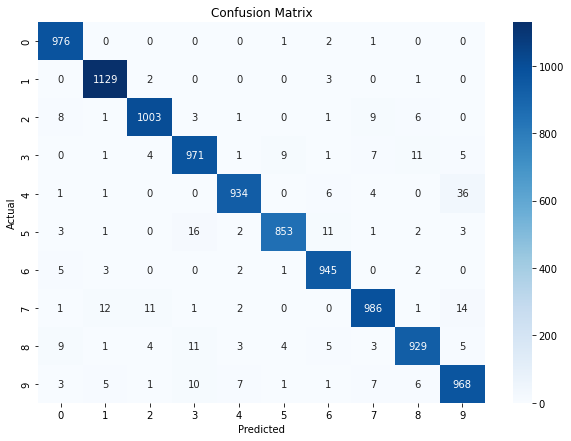

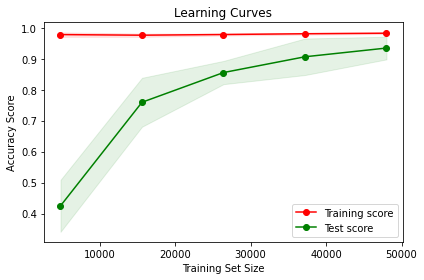

Training Accuracy: 98.16%
Test Accuracy: 96.94%

PCA with n_components=0.8400000000000001:
Accuracy: 96.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.98      0.95      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.93      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



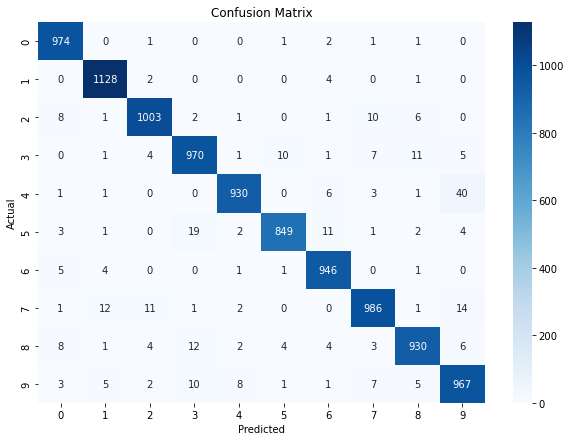

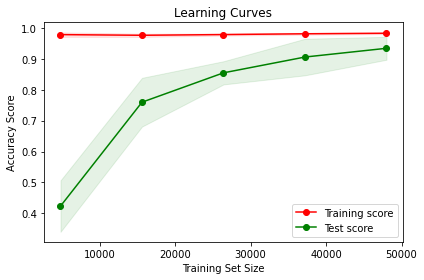

Training Accuracy: 98.18%
Test Accuracy: 96.83%

PCA with n_components=0.8500000000000001:
Accuracy: 96.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.95      0.96      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.98      0.95      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.93      0.96      0.94      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



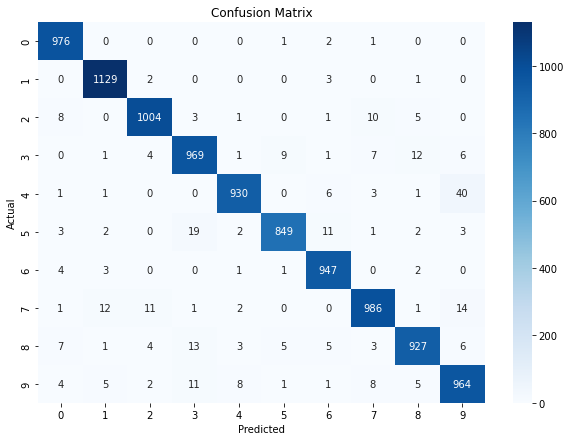

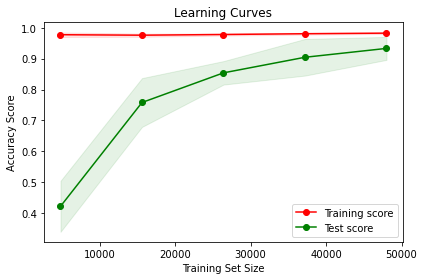

Training Accuracy: 98.16%
Test Accuracy: 96.81%


In [30]:
apply_classifier_with_pca(knn, train_images_flat, test_images_flat, y_train, y_test, start=0.75, end=0.86, step=0.01)

A PCA with an n_components value of 0.77 seemed to give the highest test accuracy. This code applies Principal Component Analysis to compress the dimensionality of image data. It specifies a target number of principal components, n_components, with a value of 0.77. The PCA is then applied separately to both the training (train_images_flat) and test (test_images_flat) image datasets. The resulting transformed datasets, train_images_flat_compressed and test_images_flat_compressed, capture the most important features of the original data while reducing its dimensionality. The choice of 0.77 as the n_components value determines the fraction of variance in the data that should be retained after dimensionality reduction.

In [31]:
# Apply PCA with a number of components value of 0.77
n_components = 0.77
print(f"PCA with n_components={n_components}:")

# Apply PCA
pca = PCA(n_components=n_components)
train_images_flat_compressed = pca.fit_transform(train_images_flat)
test_images_flat_compressed = pca.transform(test_images_flat)

PCA with n_components=0.77:


## Find the best n_neighbors
This code performs a hyperparameter search for the k-Nearest Neighbors algorithm by iterating over different values of n_neighbors (the number of neighbors to consider). It initializes variables best_accuracy and best_n_neighbors to keep track of the highest accuracy and its corresponding n_neighbors. Inside the loop, it creates a k-NN classifier with the current n_neighbors value, fits the classifier on the compressed training data, makes predictions on the compressed test data, and calculates both training and test accuracies. The code then checks if the current accuracy is higher than the previous best accuracy. If so, it updates the best_accuracy and best_n_neighbors. After the loop, it prints the best configuration with the highest accuracy found during the search. This process helps identify the optimal number of neighbors for the k-NN classifier based on the provided compressed datasets. The best n_neighbors value in this case is 5 with a test accuracy of 97.10%.

In [32]:
best_accuracy = 0.0
best_n_neighbors = 0

# Loop over different values of n_neighbors
for n_neighbors in range(1, 21):
    print(f"\nk-NN with n_neighbors={n_neighbors}:")

    # Create kNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Fit kNN classifier on the reduced dataset
    knn.fit(train_images_flat_compressed, y_train)

    # Make predictions on the test set
    predictions = knn.predict(test_images_flat_compressed)

    # Calculate and print test accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

    # Print training accuracy
    train_predictions = knn.predict(train_images_flat_compressed)
    train_accuracy = accuracy_score(y_train, train_predictions)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Check if current accuracy has higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n_neighbors

# Print the best n_neighbors value with the best accuracy
print(f"\nBest k-NN configuration - n_neighbors: {best_n_neighbors}, Accuracy: {best_accuracy * 100:.2f}%")


k-NN with n_neighbors=1:
Test Accuracy: 96.58%
Training Accuracy: 100.00%

k-NN with n_neighbors=2:
Test Accuracy: 96.44%
Training Accuracy: 98.75%

k-NN with n_neighbors=3:
Test Accuracy: 97.04%
Training Accuracy: 98.60%

k-NN with n_neighbors=4:
Test Accuracy: 97.05%
Training Accuracy: 98.40%

k-NN with n_neighbors=5:
Test Accuracy: 97.10%
Training Accuracy: 98.20%

k-NN with n_neighbors=6:
Test Accuracy: 97.03%
Training Accuracy: 98.05%

k-NN with n_neighbors=7:
Test Accuracy: 97.00%
Training Accuracy: 97.96%

k-NN with n_neighbors=8:
Test Accuracy: 96.94%
Training Accuracy: 97.84%

k-NN with n_neighbors=9:
Test Accuracy: 96.98%
Training Accuracy: 97.70%

k-NN with n_neighbors=10:
Test Accuracy: 96.90%
Training Accuracy: 97.66%

k-NN with n_neighbors=11:
Test Accuracy: 96.77%
Training Accuracy: 97.56%

k-NN with n_neighbors=12:
Test Accuracy: 96.87%
Training Accuracy: 97.51%

k-NN with n_neighbors=13:
Test Accuracy: 96.79%
Training Accuracy: 97.40%

k-NN with n_neighbors=14:
Test A

Accuracy: 97.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



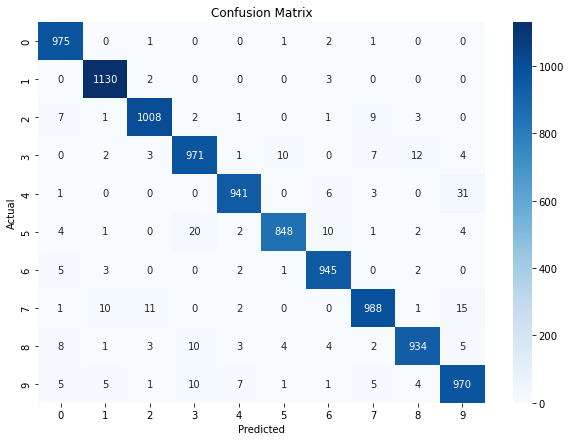

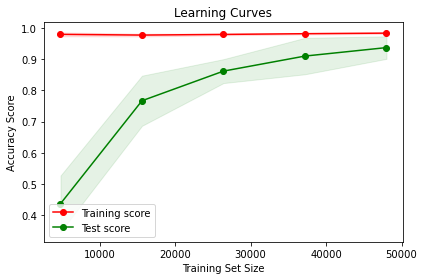

Training Accuracy: 98.20%
Test Accuracy: 97.10%


In [33]:
# Create kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit kNN classifier on the compressed dataset
knn.fit(train_images_flat_compressed, y_train)

# Make predictions on the test set
predictions = knn.predict(test_images_flat_compressed)

# Calculate and print test accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate and print classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions))

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot learning curves
plot_learning_curves(knn, train_images_flat_compressed, y_train, test_images_flat_compressed, y_test)

# Print training accuracy
train_predictions = knn.predict(train_images_flat_compressed)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Print test accuracy
print(f'Test Accuracy: {accuracy * 100:.2f}%')

## Finding optimal n_neighbors and metric hyperparameter values
This code performs a hyperparameter search for a k-Nearest Neighbors classifier, exploring different combinations of the number of neighbors (neighbors) and distance metrics (metric). It iterates through a range of neighbors from 1 to 9 and for each n_neighbors, it iterates through a list of distance metrics, including euclidean, manhattan, cosine, chebyshev, minkowski, and hamming. For each combination, a k-NN classifier is created and trained on the compressed training data (train_images_flat_compressed and y_train). Then, predictions are made on the compressed test data (test_images_flat_compressed), and both training and test accuracies are calculated using the accuracy_score function. The code prints the values of n_neighbors, metric, training accuracy, and test accuracy for each combination. This process helps identify the combination of hyperparameters that results in the best performance for the k-NN classifier on the given datasets.

In [34]:
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'chebyshev', 'minkowski', 'hamming']

for neighbors in range(1, 10):
    for metric in distance_metrics:
        knn = KNeighborsClassifier(n_neighbors=neighbors,
                                              metric=metric)

        # Train the classifier on the training data
        knn.fit(train_images_flat_compressed, y_train)

        # Make predictions on the test data
        y_pred = knn.predict(test_images_flat_compressed)

        # Evaluate the model's performance
        accuracy = accuracy_score(y_test, y_pred)
        train_predictions = knn.predict(train_images_flat_compressed)
        train_accuracy = accuracy_score(y_train, train_predictions)

        # Print n_neighbors, metric, training accuracy, and test accuracy
        print(f'Neighbors: {neighbors}, Metric: {metric}, Training Accuracy: {train_accuracy * 100:.2f}%, Test Accuracy: {accuracy * 100:.2f}%')

Neighbors: 1, Metric: euclidean, Training Accuracy: 100.00%, Test Accuracy: 96.58%
Neighbors: 1, Metric: manhattan, Training Accuracy: 100.00%, Test Accuracy: 96.71%
Neighbors: 1, Metric: cosine, Training Accuracy: 100.00%, Test Accuracy: 96.60%
Neighbors: 1, Metric: chebyshev, Training Accuracy: 100.00%, Test Accuracy: 95.63%
Neighbors: 1, Metric: minkowski, Training Accuracy: 100.00%, Test Accuracy: 96.58%
Neighbors: 1, Metric: hamming, Training Accuracy: 100.00%, Test Accuracy: 8.98%
Neighbors: 2, Metric: euclidean, Training Accuracy: 98.75%, Test Accuracy: 96.44%
Neighbors: 2, Metric: manhattan, Training Accuracy: 98.64%, Test Accuracy: 96.31%
Neighbors: 2, Metric: cosine, Training Accuracy: 98.71%, Test Accuracy: 96.43%
Neighbors: 2, Metric: chebyshev, Training Accuracy: 98.30%, Test Accuracy: 95.46%
Neighbors: 2, Metric: minkowski, Training Accuracy: 98.75%, Test Accuracy: 96.44%
Neighbors: 2, Metric: hamming, Training Accuracy: 80.33%, Test Accuracy: 8.98%
Neighbors: 3, Metric: 

This code defines a function run_knn_after_for_various_k_and_metrics that takes parameters such as the number of neighbors (neighbors), distance metric (metric), compressed training and test image datasets, and their corresponding labels. The function creates a k-Nearest Neighbors classifier with the specified parameters, fits the classifier on the compressed training data, and makes predictions on the test set. It then evaluates the model's performance by printing the test accuracy, generating and printing a classification report, visualizing the confusion matrix, plotting learning curves, and printing both training and test accuracies.

The code runs this function on four specific combinations of neighbors (6, 3, 4, and 5) and a fixed metric (euclidean). These combinations are chosen based on the highest test accuracy observed. The purpose is to investigate how varying the number of neighbors influences the performance of the k-NN classifier while maintaining a constant distance metric. This focused analysis allows for a detailed comparison of the classifier's behavior under different values of k, emphasizing the configurations that yield the best test accuracy. The results, including accuracy scores, classification reports, confusion matrices, learning curves, and accuracy values for training and testing, are printed for each selected combination. The hyperparameter combination that results in the highest accuracy is a number of neighbors of 5 and metric of euclidean with a test accuracy of 97.10%.

In [35]:
def run_knn_after_for_various_k_and_metrics(neighbors, metric, train_images_flat_compressed, y_train, test_images_flat_compressed, y_test):
    # Create kNN classifier
    knn = KNeighborsClassifier(n_neighbors=neighbors, metric=metric)

    # Fit kNN classifier on the compressed dataset
    knn.fit(train_images_flat_compressed, y_train)

    # Make predictions on the test set
    predictions = knn.predict(test_images_flat_compressed)

    # Calculate and print test accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f'Neighbors: {neighbors}, Metric: {metric}, Test Accuracy: {accuracy * 100:.2f}%')

    # Generate and print classification report
    print('\nClassification Report:')
    print(classification_report(y_test, predictions))

    # Generate confusion matrix
    conf_mat = confusion_matrix(y_test, predictions)

    # Visualize confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot learning curves
    plot_learning_curves(knn, train_images_flat_compressed, y_train, test_images_flat_compressed, y_test)

    # Print training accuracy
    train_predictions = knn.predict(train_images_flat_compressed)
    train_accuracy = accuracy_score(y_train, train_predictions)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Print test accuracy
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

Neighbors: 6, Metric: euclidean, Test Accuracy: 97.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



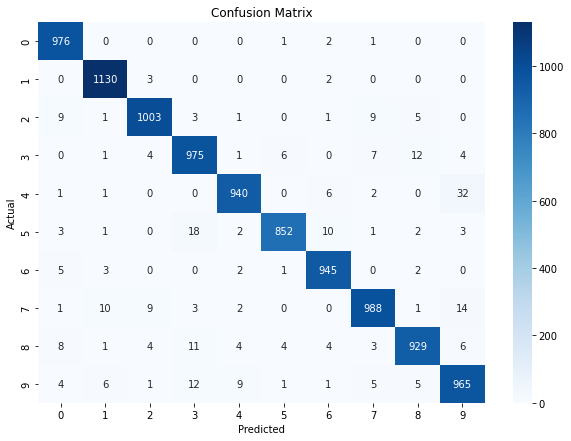

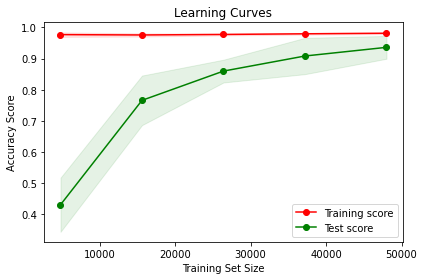

Training Accuracy: 98.05%
Test Accuracy: 97.03%
Neighbors: 3, Metric: euclidean, Test Accuracy: 97.04%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



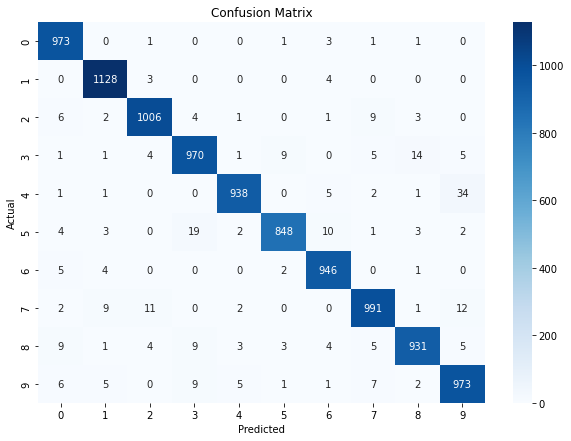

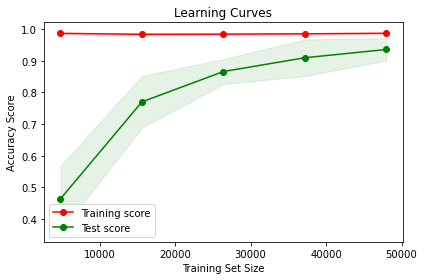

Training Accuracy: 98.60%
Test Accuracy: 97.04%
Neighbors: 4, Metric: euclidean, Test Accuracy: 97.05%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



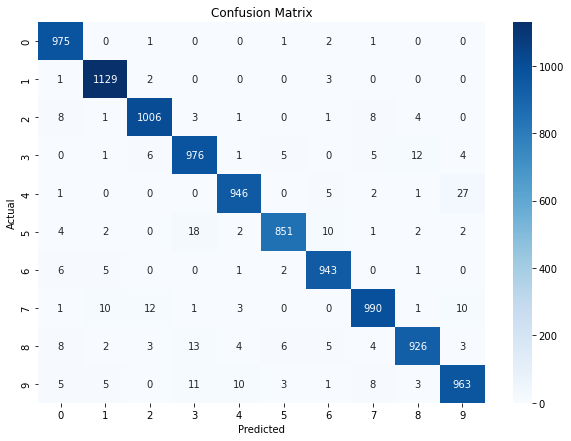

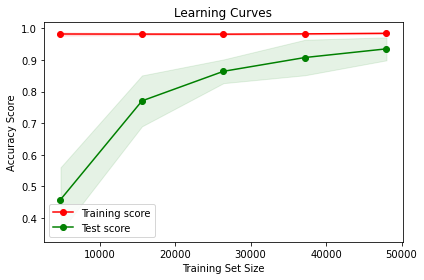

Training Accuracy: 98.40%
Test Accuracy: 97.05%
Neighbors: 5, Metric: euclidean, Test Accuracy: 97.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



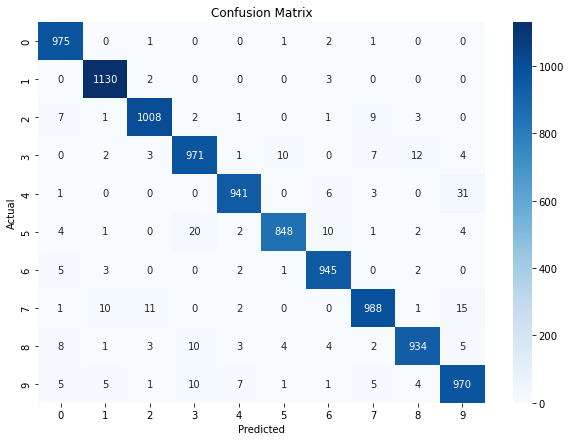

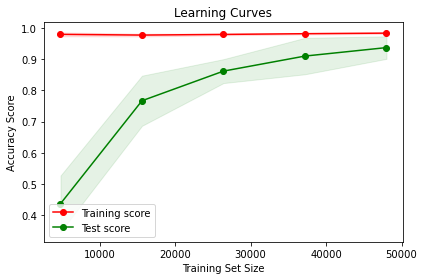

Training Accuracy: 98.20%
Test Accuracy: 97.10%


In [36]:
# Run the function for different combinations

run_knn_after_for_various_k_and_metrics(neighbors=6, metric='euclidean', train_images_flat_compressed=train_images_flat_compressed, y_train=y_train, test_images_flat_compressed=test_images_flat_compressed, y_test=y_test)
run_knn_after_for_various_k_and_metrics(neighbors=3, metric='euclidean', train_images_flat_compressed=train_images_flat_compressed, y_train=y_train, test_images_flat_compressed=test_images_flat_compressed, y_test=y_test)
run_knn_after_for_various_k_and_metrics(neighbors=4, metric='euclidean', train_images_flat_compressed=train_images_flat_compressed, y_train=y_train, test_images_flat_compressed=test_images_flat_compressed, y_test=y_test)
run_knn_after_for_various_k_and_metrics(neighbors=5, metric='euclidean', train_images_flat_compressed=train_images_flat_compressed, y_train=y_train, test_images_flat_compressed=test_images_flat_compressed, y_test=y_test)

## Finding optimal n_neighbors, weight, and metric hyperparameter combinations
This code performs a hyperparameter search for a k-Nearest Neighbors classifier with multiple variations of parameters. It starts by applying Principal Component Analysis with a specified number of components (0.77) to compress the dimensionality of both the training and test image datasets. It then iterates through different combinations of neighbors, weighting schemes, and distance metrics in nested loops. For each combination, it creates a k-NN classifier with the specified parameters, trains the classifier on the compressed training data, makes predictions on the compressed test data, and evaluates the model's performance by calculating and printing both training and test accuracies. The results are printed, including the number of neighbors, distance metric, weighting scheme, training accuracy, and test accuracy for each combination. This exhaustive search helps identify the optimal combination of hyperparameters for the k-NN classifier based on the compressed datasets.

In [37]:
pca = PCA(n_components=0.77)
train_images_flat_compressed = pca.fit_transform(train_images_flat)
test_images_flat_compressed = pca.transform(test_images_flat)
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'chebyshev', 'minkowski', 'hamming']
weighting_schemes = ['uniform', 'distance']

for neighbors in range(1, 10):
    for weight in weighting_schemes:
        for metric in distance_metrics:
            knn = KNeighborsClassifier(n_neighbors=neighbors,
                                       weights=weight,
                                       metric=metric)
            # Train the classifier on the training data
            knn.fit(train_images_flat_compressed, y_train)

            # Make predictions on the test data
            y_pred = knn.predict(test_images_flat_compressed)

            # Evaluate the model's performance
            accuracy = accuracy_score(y_test, y_pred)
            train_predictions = knn.predict(train_images_flat_compressed)
            train_accuracy = accuracy_score(y_train, train_predictions)

            # Print n_neighbors, metric, weighting scheme, training accuracy, and test accuracy
            print(f'Neighbors: {neighbors}, Metric: {metric}, Weighting Scheme: {weight}, Training Accuracy: {train_accuracy * 100:.2f}%, Test Accuracy: {accuracy * 100:.2f}%')

Neighbors: 1, Metric: euclidean, Weighting Scheme: uniform, Training Accuracy: 100.00%, Test Accuracy: 96.58%
Neighbors: 1, Metric: manhattan, Weighting Scheme: uniform, Training Accuracy: 100.00%, Test Accuracy: 96.71%
Neighbors: 1, Metric: cosine, Weighting Scheme: uniform, Training Accuracy: 100.00%, Test Accuracy: 96.60%
Neighbors: 1, Metric: chebyshev, Weighting Scheme: uniform, Training Accuracy: 100.00%, Test Accuracy: 95.63%
Neighbors: 1, Metric: minkowski, Weighting Scheme: uniform, Training Accuracy: 100.00%, Test Accuracy: 96.58%
Neighbors: 1, Metric: hamming, Weighting Scheme: uniform, Training Accuracy: 100.00%, Test Accuracy: 8.98%
Neighbors: 1, Metric: euclidean, Weighting Scheme: distance, Training Accuracy: 100.00%, Test Accuracy: 96.58%
Neighbors: 1, Metric: manhattan, Weighting Scheme: distance, Training Accuracy: 100.00%, Test Accuracy: 96.71%
Neighbors: 1, Metric: cosine, Weighting Scheme: distance, Training Accuracy: 100.00%, Test Accuracy: 96.60%
Neighbors: 1, Me

Neighbors: 7, Metric: minkowski, Weighting Scheme: uniform, Training Accuracy: 97.96%, Test Accuracy: 97.00%
Neighbors: 7, Metric: hamming, Weighting Scheme: uniform, Training Accuracy: 11.24%, Test Accuracy: 11.35%
Neighbors: 7, Metric: euclidean, Weighting Scheme: distance, Training Accuracy: 100.00%, Test Accuracy: 97.04%
Neighbors: 7, Metric: manhattan, Weighting Scheme: distance, Training Accuracy: 100.00%, Test Accuracy: 97.01%
Neighbors: 7, Metric: cosine, Weighting Scheme: distance, Training Accuracy: 100.00%, Test Accuracy: 97.06%
Neighbors: 7, Metric: chebyshev, Weighting Scheme: distance, Training Accuracy: 100.00%, Test Accuracy: 96.19%
Neighbors: 7, Metric: minkowski, Weighting Scheme: distance, Training Accuracy: 100.00%, Test Accuracy: 97.04%
Neighbors: 7, Metric: hamming, Weighting Scheme: distance, Training Accuracy: 100.00%, Test Accuracy: 11.35%
Neighbors: 8, Metric: euclidean, Weighting Scheme: uniform, Training Accuracy: 97.84%, Test Accuracy: 96.94%
Neighbors: 8, 

This code defines a function run_knn_after_for_various_k_metrics_weights that takes parameters such as the number of neighbors (neighbors), distance metric (metric), weighting scheme (weights), compressed training and test image datasets, and their corresponding labels. The function creates a k-Nearest Neighbors (k-NN) classifier with the specified parameters, fits the classifier on the compressed training data, and makes predictions on the test set. It then evaluates the model's performance by calculating and printing both training and test accuracies, generating and printing a classification report, visualizing the confusion matrix, and plotting learning curves.

Following the function definition, the code runs this function multiple times with different combinations of neighbors, metric, and weights. The purpose is to observe how changing these parameters influences the performance of the k-NN classifier. The selected combinations include variations in the number of neighbors (6, 4, 3, 5 respectively), distance metric (euclidean, euclidean, euclidean, and minkowski respectively), and weighting scheme (distance, distance, distance, and uniform respectively). The results, including accuracy scores, classification reports, confusion matrices, learning curves, and accuracy values for training and testing, are printed for each selected combination. This provides insights into the behavior of the k-NN classifier under different configurations, helping to identify optimal settings for the given datasets. The hyperparamter combination that results in the highest test accuracy is a number of neighbors of 6, metric of euclidean and weighting scheme of distance with a test accuracy of 97.18%.

In [38]:
def run_knn_after_for_various_k_metrics_weights(neighbors, metric, weights, train_images_flat_compressed, y_train, test_images_flat_compressed, y_test):
    # Create kNN classifier
    knn = KNeighborsClassifier(n_neighbors=neighbors, metric=metric, weights=weights)

    # Fit kNN classifier on the compressed dataset
    knn.fit(train_images_flat_compressed, y_train)

    # Make predictions on the test set
    predictions = knn.predict(test_images_flat_compressed)

    # Calculate and print test accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f'Neighbors: {neighbors}, Metric: {metric}, Weighting Scheme: {weights}, Test Accuracy: {accuracy * 100:.2f}%')

    # Generate and print classification report
    print('\nClassification Report:')
    print(classification_report(y_test, predictions))

    # Generate confusion matrix
    conf_mat = confusion_matrix(y_test, predictions)

    # Visualize confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot learning curves
    plot_learning_curves(knn, train_images_flat_compressed, y_train, test_images_flat_compressed, y_test)

    # Print training accuracy
    train_predictions = knn.predict(train_images_flat_compressed)
    train_accuracy = accuracy_score(y_train, train_predictions)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Print test accuracy
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

Neighbors: 6, Metric: euclidean, Weighting Scheme: distance, Test Accuracy: 97.18%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



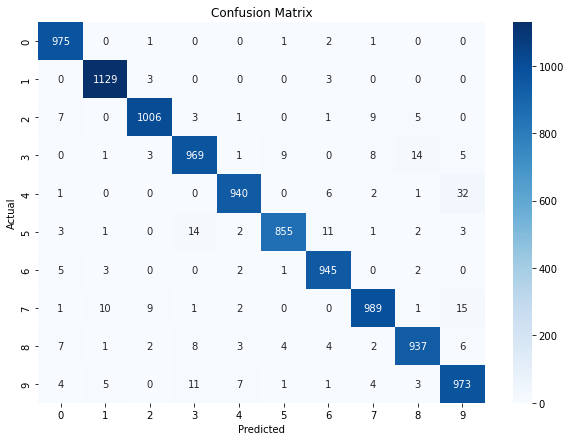

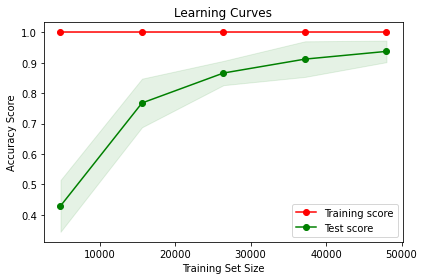

Training Accuracy: 100.00%
Test Accuracy: 97.18%
Neighbors: 4, Metric: euclidean, Weighting Scheme: distance, Test Accuracy: 97.16%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



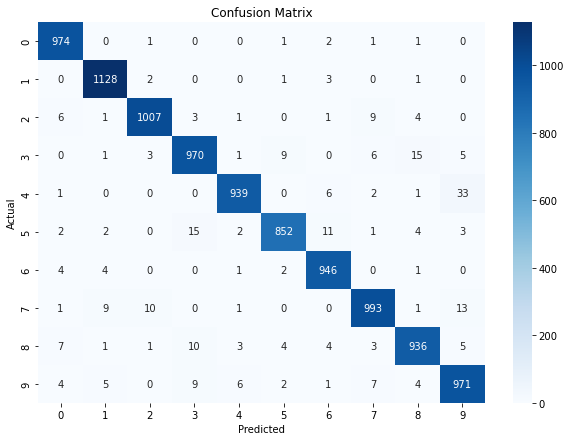

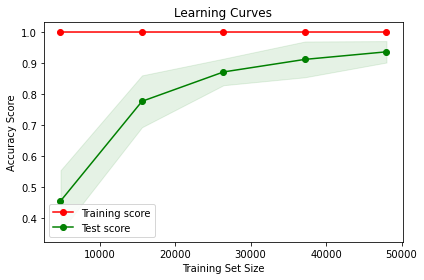

Training Accuracy: 100.00%
Test Accuracy: 97.16%
Neighbors: 3, Metric: euclidean, Weighting Scheme: distance, Test Accuracy: 97.14%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.95      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.94      0.97      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



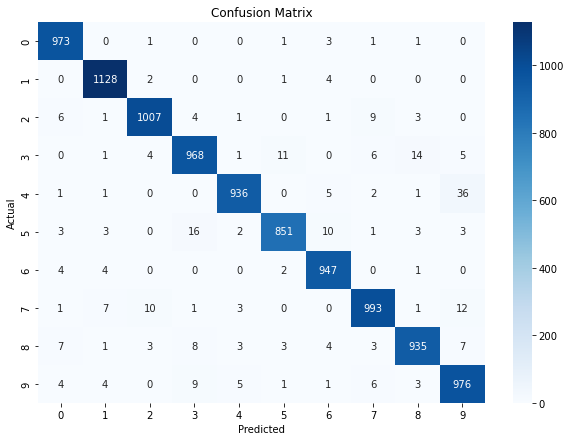

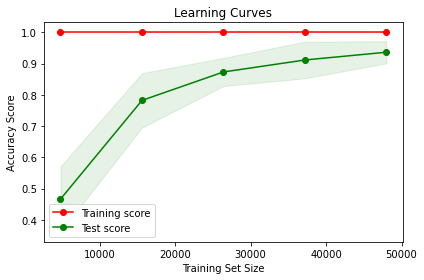

Training Accuracy: 100.00%
Test Accuracy: 97.14%
Neighbors: 5, Metric: minkowski, Weighting Scheme: uniform, Test Accuracy: 97.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



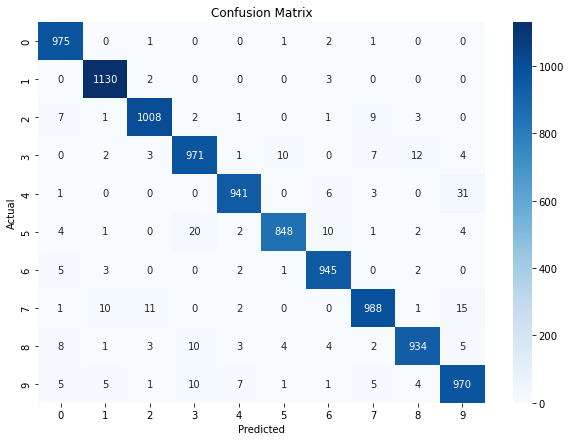

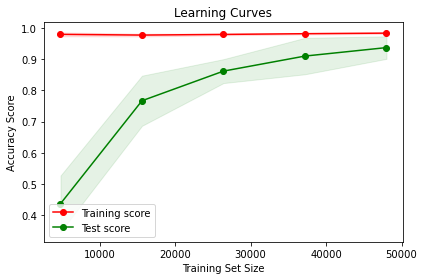

Training Accuracy: 98.20%
Test Accuracy: 97.10%


In [39]:
# Run the function for different combinations
run_knn_after_for_various_k_metrics_weights(neighbors=6, metric='euclidean', weights='distance', train_images_flat_compressed=train_images_flat_compressed, y_train=y_train, test_images_flat_compressed=test_images_flat_compressed, y_test=y_test)
run_knn_after_for_various_k_metrics_weights(neighbors=4, metric='euclidean', weights='distance', train_images_flat_compressed=train_images_flat_compressed, y_train=y_train, test_images_flat_compressed=test_images_flat_compressed, y_test=y_test)
run_knn_after_for_various_k_metrics_weights(neighbors=3, metric='euclidean', weights='distance', train_images_flat_compressed=train_images_flat_compressed, y_train=y_train, test_images_flat_compressed=test_images_flat_compressed, y_test=y_test)
run_knn_after_for_various_k_metrics_weights(neighbors=5, metric='minkowski', weights='uniform', train_images_flat_compressed=train_images_flat_compressed, y_train=y_train, test_images_flat_compressed=test_images_flat_compressed, y_test=y_test)

## In the above runs, The parameter combination that results in the highest test accuracy is n_neighbors=6, metric='euclidean' and weights='distance' with a test accuracy of 97.18%. 
This code conducts a randomized search for optimal hyperparameters for a k-Nearest Neighbors (k-NN) classifier using scikit-learn's RandomizedSearchCV. The hyperparameter space includes the number of neighbors, weighting schemes, algorithm types, leaf sizes, distance metrics, and metric parameters. The search is performed with 5-fold cross-validation, and the objective is to maximize accuracy. After fitting the randomized search on the compressed training data, the code prints the best hyperparameters found. Subsequently, it retrieves the best model based on these hyperparameters and evaluates its accuracy on the test set. This approach efficiently explores various combinations of hyperparameters to identify the configuration that optimizes the k-NN classifier's performance on the given datasets. In this case, the best hyperparameters found ({'weights': 'uniform', 'p': 2, 'n_neighbors': 7, 'metric_params': None, 'metric': 'euclidean', 'leaf_size': 40, 'algorithm': 'kd_tree'}) resulted in a test accuracy of 97.04% and a training accuracy of 100%. 

In [40]:
knn_classifier = KNeighborsClassifier()
param_dist = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'cosine', 'chebyshev', 'minkowski'],
    'metric_params': [None]
}

random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

random_search.fit(train_images_flat_compressed, y_train)

print("Best Hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(test_images_flat_compressed)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "C:\Users\sarah\anaconda3\lib\site-pa

Best Hyperparameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 7, 'metric_params': None, 'metric': 'euclidean', 'leaf_size': 40, 'algorithm': 'kd_tree'}
Accuracy: 0.97


Due to the nature of RandomizedSearchCV, the above best hyperparameters don't exactly match the best hyperparameters used below, which are from a different run of the code.

Hyperparameters: Weights=distance, Neighbors=7, Metric=euclidean, P=1, Metric Params=None, Leaf Size=40, Algorithm=kd_tree
Accuracy: 97.04%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.95      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.93      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



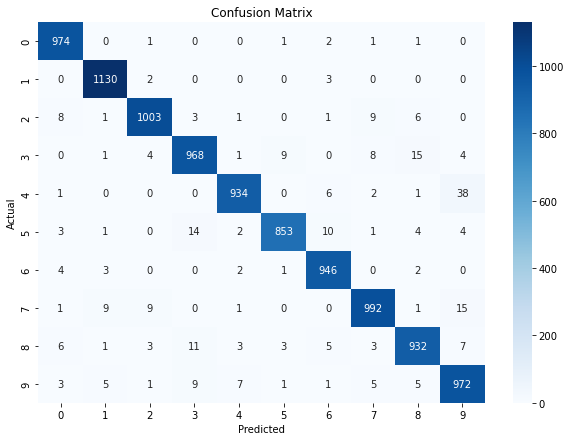

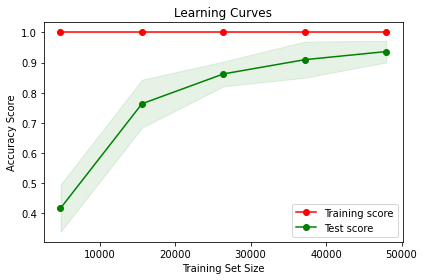

Training Accuracy: 100.00%


In [41]:
weights = 'distance'
n_neighbors = 7
metric = 'euclidean'
p = 1
metric_params = None
leaf_size = 40
algorithm = 'kd_tree'

# Create kNN classifier with specified hyperparameters
knn_randomized_search = KNeighborsClassifier(weights=weights, n_neighbors=n_neighbors, metric=metric, p=p,
                                             metric_params=metric_params, leaf_size=leaf_size, algorithm=algorithm)

# Fit kNN classifier on the compressed dataset
knn_randomized_search.fit(train_images_flat_compressed, y_train)

# Make predictions on the test set
predictions_randomized_search = knn_randomized_search.predict(test_images_flat_compressed)

# Calculate and print test accuracy
accuracy_randomized_search = accuracy_score(y_test, predictions_randomized_search)
print(f'Hyperparameters: Weights={weights}, Neighbors={n_neighbors}, Metric={metric}, P={p}, Metric Params={metric_params}, Leaf Size={leaf_size}, Algorithm={algorithm}')
print(f'Accuracy: {accuracy_randomized_search * 100:.2f}%')

# Generate and print classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions_randomized_search))

# Generate confusion matrix
conf_mat_randomized_search = confusion_matrix(y_test, predictions_randomized_search)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat_randomized_search, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot learning curves
plot_learning_curves(knn_randomized_search, train_images_flat_compressed, y_train, test_images_flat_compressed, y_test)

# Print training accuracy
train_predictions_randomized_search = knn_randomized_search.predict(train_images_flat_compressed)
train_accuracy_randomized_search = accuracy_score(y_train, train_predictions_randomized_search)
print(f'Training Accuracy: {train_accuracy_randomized_search * 100:.2f}%')

## kNN With Bagging and Parameters weights='distance', n_neighbors=6, metric='euclidean'

Hyperparameters: Weights=distance, Neighbors=6, Metric=euclidean
Accuracy: 97.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



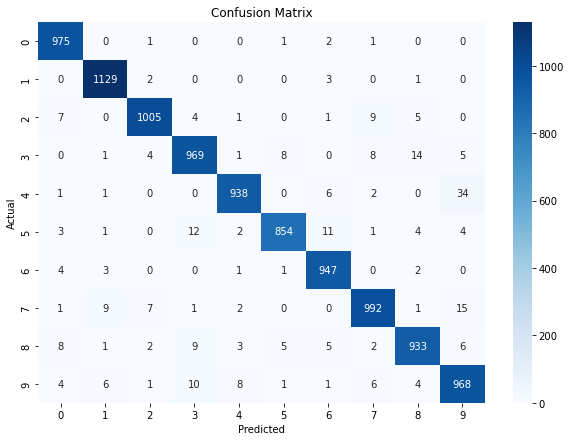

Training Accuracy: 99.85%


In [42]:
# Specify kNN hyperparameters
weights = 'distance'
n_neighbors = 6
metric = 'euclidean'

# Create kNN classifier with specified hyperparameters
knn_bagging = KNeighborsClassifier(weights=weights, n_neighbors=n_neighbors, metric=metric)

# Create bagging classifier with kNN as the base estimator
bagging_classifier = BaggingClassifier(base_estimator=knn_bagging, n_estimators=10, random_state=42)

# Fit bagging classifier on the compressed dataset
bagging_classifier.fit(train_images_flat_compressed, y_train)

# Make predictions on the test set
predictions_bagging = bagging_classifier.predict(test_images_flat_compressed)

# Calculate and print test accuracy
accuracy_bagging = accuracy_score(y_test, predictions_bagging)
print(f'Hyperparameters: Weights={weights}, Neighbors={n_neighbors}, Metric={metric}')
print(f'Accuracy: {accuracy_bagging * 100:.2f}%')

# Generate and print classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions_bagging))

# Generate confusion matrix
conf_mat_bagging = confusion_matrix(y_test, predictions_bagging)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat_bagging, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

train_predictions_bagging = bagging_classifier.predict(train_images_flat_compressed)
train_accuracy_bagging = accuracy_score(y_train, train_predictions_bagging)
print(f'Training Accuracy: {train_accuracy_bagging * 100:.2f}%')

## Best Parameters weights='distance', n_neighbors=6, metric='euclidean'
This code applies a k-Nearest Neighbors (k-NN) classifier with specific hyperparameters—weights set to 'distance,' the number of neighbors as 6, and the distance metric as 'euclidean'—to a dataset. This hyperparameter combination resulted in the highest test accuracy during hyperparameter tuning. The k-NN classifier is trained on compressed training data obtained through Principal Component Analysis. The training accuracy is 100% and the test accuracy is 97.18%. Subsequently, predictions are made on the test set, and the accuracy of the classifier is calculated and printed. Additionally, the code generates and displays a classification report, a confusion matrix, and learning curves to provide a comprehensive overview of the classifier's performance. As the learning curves plot shows, there is not much overfitting.

Hyperparameters: Weights=distance, Neighbors=6, Metric=euclidean
Accuracy: 97.18%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



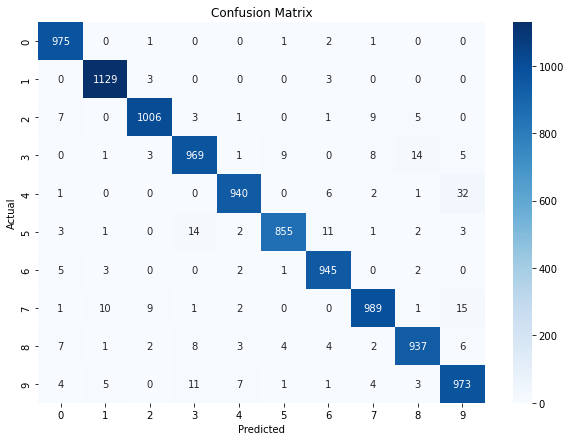

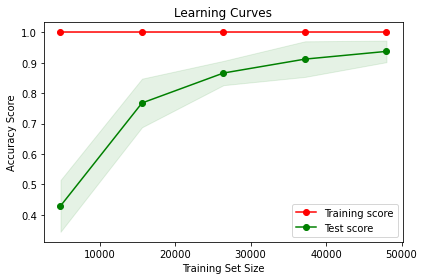

Training Accuracy: 100.00%


In [43]:
weights = 'distance'
n_neighbors = 6
metric = 'euclidean'

# Create kNN classifier with specified hyperparameters
knn_best = KNeighborsClassifier(weights=weights, n_neighbors=n_neighbors, metric=metric)

# Fit kNN classifier on the compressed dataset
knn_best.fit(train_images_flat_compressed, y_train)

# Make predictions on the test set
predictions_best = knn_best.predict(test_images_flat_compressed)

# Calculate and print test accuracy
accuracy_best = accuracy_score(y_test, predictions_best)
print(f'Hyperparameters: Weights={weights}, Neighbors={n_neighbors}, Metric={metric}')
print(f'Accuracy: {accuracy_best * 100:.2f}%')

# Generate and print classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions_best))

# Generate confusion matrix
conf_mat_best = confusion_matrix(y_test, predictions_best)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot learning curves
plot_learning_curves(knn_best, train_images_flat_compressed, y_train, test_images_flat_compressed, y_test)

# Print training accuracy
train_predictions_best = knn_best.predict(train_images_flat_compressed)
train_accuracy_best = accuracy_score(y_train, train_predictions_best)
print(f'Training Accuracy: {train_accuracy_best * 100:.2f}%')

# CNN Algorithm
Code by Sarah Thuman
## Preprocess data specfic to CNN

In [47]:
#exapnd dimension so that images have shape (28,28,1)
X_train = normalize(x_train)
X_test = normalize(x_test)
X_train = np.expand_dims(x_train,-1)
X_test = np.expand_dims(x_test,-1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)

print(Y_train[0])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Baseline Model
Baseline model includes 2 convultional layers each followed by a max pooling layer, a dropout layer for regularization, and 1 dense layer with a softmax activation function to probabilistically predict what the image is.

In [79]:
#Baseline CNN Model
cnn_model = Sequential()

cnn_model.add(Input(shape=(28,28,1)))
cnn_model.add(Conv2D(32, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_11 (Dropout)        (None, 1600)            

Epoch 1/10
1688/1688 [==============================] - 15s 9ms/step - loss: 18.3174 - acc: 0.3281 - val_loss: 2.8758 - val_acc: 0.5863
Epoch 2/10
1688/1688 [==============================] - 14s 8ms/step - loss: 2.9572 - acc: 0.6015 - val_loss: 1.3409 - val_acc: 0.7205
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 1.4639 - acc: 0.7016 - val_loss: 0.8353 - val_acc: 0.7947
Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.9720 - acc: 0.7625 - val_loss: 0.6142 - val_acc: 0.8388
Epoch 5/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.7290 - acc: 0.8058 - val_loss: 0.4840 - val_acc: 0.8735
Epoch 6/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.6006 - acc: 0.8362 - val_loss: 0.4110 - val_acc: 0.8923
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.5060 - acc: 0.8596 - val_loss: 0.3879 - val_acc: 0.8985
Epoch 8/10
1688/1688 [==============================] 

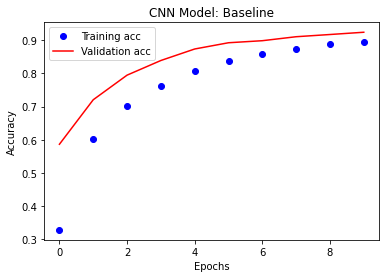

In [53]:
#compile model
learning_rate = 1E-5

cnn_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=learning_rate),
              metrics=['acc'])

#save training run
history = cnn_model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.1)

#plot of training accuracy versus validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("CNN Model: Baseline")
plt.legend()
plt.show()

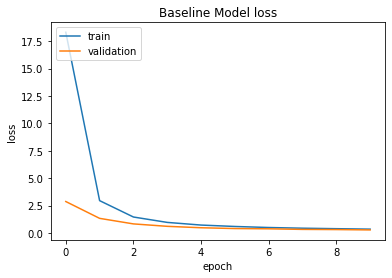

In [68]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Baseline Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Hyperparameter tuning for Baseline

In [58]:
#Hyperparameter tuning
learning_rate = 1E-1

cnn_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=learning_rate),
              metrics=['acc'])

param_tune1 = cnn_model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.1)

#results: training accuracy: 0.1133, valildation accuracy: 0.0440

Epoch 1/10
1688/1688 [==============================] - 15s 8ms/step - loss: 75.3642 - acc: 0.1159 - val_loss: 3.1002 - val_acc: 0.0118
Epoch 2/10
1688/1688 [==============================] - 14s 8ms/step - loss: 2.2848 - acc: 0.1146 - val_loss: 2.8881 - val_acc: 0.0000e+00
Epoch 3/10
1688/1688 [==============================] - 14s 8ms/step - loss: 2.2849 - acc: 0.1145 - val_loss: 2.9224 - val_acc: 0.0118
Epoch 4/10
1688/1688 [==============================] - 14s 8ms/step - loss: 2.2843 - acc: 0.1156 - val_loss: 3.2139 - val_acc: 0.0000e+00
Epoch 5/10
1688/1688 [==============================] - 14s 9ms/step - loss: 2.2847 - acc: 0.1159 - val_loss: 3.0795 - val_acc: 0.0118
Epoch 6/10
1688/1688 [==============================] - 14s 9ms/step - loss: 2.2852 - acc: 0.1129 - val_loss: 2.7630 - val_acc: 0.0067
Epoch 7/10
1688/1688 [==============================] - 14s 8ms/step - loss: 2.2846 - acc: 0.1157 - val_loss: 2.9772 - val_acc: 0.0000e+00
Epoch 8/10
1688/1688 [====================

In [60]:
learning_rate = 1E-2

cnn_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=learning_rate),
              metrics=['acc'])

param_tune2 = cnn_model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.1)

#results: training accuracy: 0.9027, valildation accuracy: 0.9445

Epoch 1/10
1688/1688 [==============================] - 15s 9ms/step - loss: 1.2504 - acc: 0.8405 - val_loss: 0.1652 - val_acc: 0.9575
Epoch 2/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3408 - acc: 0.9050 - val_loss: 0.1348 - val_acc: 0.9600
Epoch 3/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3377 - acc: 0.9055 - val_loss: 0.1403 - val_acc: 0.9597
Epoch 4/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.3351 - acc: 0.9041 - val_loss: 0.1368 - val_acc: 0.9588
Epoch 5/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3363 - acc: 0.9043 - val_loss: 0.1546 - val_acc: 0.9553
Epoch 6/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3470 - acc: 0.9074 - val_loss: 0.1717 - val_acc: 0.9522
Epoch 7/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.3556 - acc: 0.9066 - val_loss: 0.1501 - val_acc: 0.9575
Epoch 8/10
1688/1688 [==============================] -

In [62]:
learning_rate = 1E-3

cnn_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=learning_rate),
              metrics=['acc'])

param_tune3 = cnn_model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.1)

#results: training accuracy: 0.9715, valildation accuracy: 0.9848

Epoch 1/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.5663 - acc: 0.9064 - val_loss: 0.1294 - val_acc: 0.9675
Epoch 2/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1493 - acc: 0.9591 - val_loss: 0.0817 - val_acc: 0.9787
Epoch 3/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1291 - acc: 0.9658 - val_loss: 0.0733 - val_acc: 0.9785
Epoch 4/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1215 - acc: 0.9679 - val_loss: 0.0532 - val_acc: 0.9842
Epoch 5/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.1145 - acc: 0.9695 - val_loss: 0.0659 - val_acc: 0.9837
Epoch 6/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1187 - acc: 0.9694 - val_loss: 0.1094 - val_acc: 0.9697
Epoch 7/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1156 - acc: 0.9706 - val_loss: 0.1000 - val_acc: 0.9827
Epoch 8/10
1688/1688 [==============================] -

In [64]:
learning_rate = 1E-4

cnn_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=learning_rate),
              metrics=['acc'])

param_tune4 = cnn_model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.1)

#results: training accuracy: 0.9740, valildation accuracy: 0.9823

Epoch 1/10
1688/1688 [==============================] - 14s 8ms/step - loss: 2.9559 - acc: 0.7430 - val_loss: 0.2117 - val_acc: 0.9377
Epoch 2/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2651 - acc: 0.9249 - val_loss: 0.1229 - val_acc: 0.9648
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1828 - acc: 0.9480 - val_loss: 0.1065 - val_acc: 0.9712
Epoch 4/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.1456 - acc: 0.9584 - val_loss: 0.1049 - val_acc: 0.9705
Epoch 5/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1286 - acc: 0.9626 - val_loss: 0.0817 - val_acc: 0.9778
Epoch 6/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1142 - acc: 0.9672 - val_loss: 0.0824 - val_acc: 0.9768
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1071 - acc: 0.9700 - val_loss: 0.0750 - val_acc: 0.9818
Epoch 8/10
1688/1688 [==============================] -

In [66]:
learning_rate = 1E-5

cnn_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=learning_rate),
              metrics=['acc'])

param_tune5 = cnn_model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.1)

#results: training accuracy: 0.9024, valildation accuracy: 0.9245

Epoch 1/10
1688/1688 [==============================] - 15s 8ms/step - loss: 21.5048 - acc: 0.2929 - val_loss: 5.6899 - val_acc: 0.3405
Epoch 2/10
1688/1688 [==============================] - 14s 8ms/step - loss: 3.2036 - acc: 0.5995 - val_loss: 1.4638 - val_acc: 0.6548
Epoch 3/10
1688/1688 [==============================] - 14s 8ms/step - loss: 1.4836 - acc: 0.7132 - val_loss: 0.8879 - val_acc: 0.7635
Epoch 4/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.9780 - acc: 0.7760 - val_loss: 0.6298 - val_acc: 0.8240
Epoch 5/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.7301 - acc: 0.8157 - val_loss: 0.4695 - val_acc: 0.8643
Epoch 6/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.5929 - acc: 0.8434 - val_loss: 0.4143 - val_acc: 0.8805
Epoch 7/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.5064 - acc: 0.8655 - val_loss: 0.3342 - val_acc: 0.9032
Epoch 8/10
1688/1688 [==============================] 

### Plot of training accuracy vs. validation accuracy for best learning rate (1E-3)

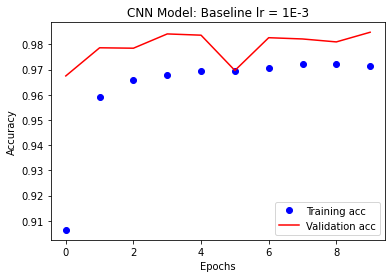

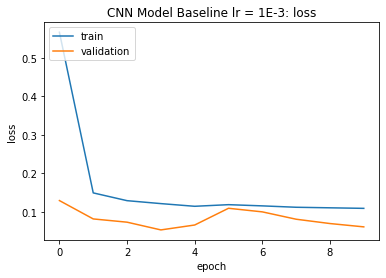

In [82]:
#plot of training accuracy versus validation accuracy for best learning rate (1E-3)
acc = param_tune3.history['acc']
val_acc = param_tune3.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("CNN Model: Baseline lr = 1E-3")
plt.legend()
plt.show()

#summarize history for loss
plt.plot(param_tune3.history['loss'])
plt.plot(param_tune3.history['val_loss'])
plt.title('CNN Model Baseline lr = 1E-3: loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Baseline with optimizer = adam

Epoch 1/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.6665 - acc: 0.8850 - val_loss: 0.0895 - val_acc: 0.9703
Epoch 2/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1534 - acc: 0.9539 - val_loss: 0.0991 - val_acc: 0.9670
Epoch 3/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1229 - acc: 0.9631 - val_loss: 0.0587 - val_acc: 0.9837
Epoch 4/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1094 - acc: 0.9672 - val_loss: 0.0523 - val_acc: 0.9833
Epoch 5/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0967 - acc: 0.9712 - val_loss: 0.0497 - val_acc: 0.9870
Epoch 6/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0885 - acc: 0.9737 - val_loss: 0.0523 - val_acc: 0.9857
Epoch 7/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0818 - acc: 0.9747 - val_loss: 0.0604 - val_acc: 0.9827
Epoch 8/10
1688/1688 [==============================] -

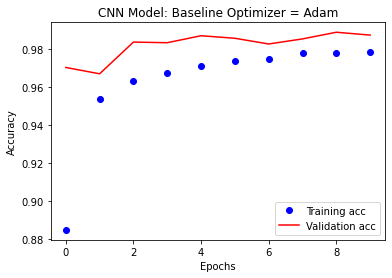

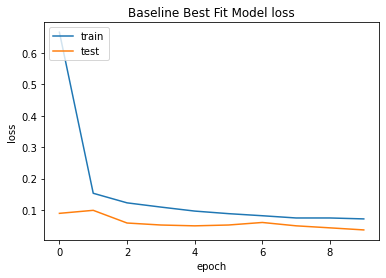

In [80]:
cnn_model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

param_tune6 = cnn_model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.1)

#results: training accuracy: 0.9796, valildation accuracy: 0.9873

#plot of training accuracy versus validation accuracy
acc = param_tune6.history['acc']
val_acc = param_tune6.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("CNN Model: Baseline Optimizer = Adam")
plt.legend()
plt.show()
                            
#summarize history for loss
plt.plot(param_tune6.history['loss'])
plt.plot(param_tune6.history['val_loss'])
plt.title('Baseline Best Fit Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Best solution for the baseline CNN model is to use Adam as the optimizer which resulted in a training accuracy of 97.86% and a validation accuracy of 98.73% 

## Alternate Model 1: Batch Normalization

In [83]:
#Alternate 1 CNN Model
alt_model = Sequential()

alt_model.add(Input(shape=(28,28,1)))
alt_model.add(Conv2D(32, (3,3), activation='relu'))
alt_model.add(MaxPooling2D((2,2)))
alt_model.add(Conv2D(64, (3,3)))
alt_model.add(BatchNormalization())
alt_model.add(Activation("relu"))
alt_model.add(MaxPooling2D((2,2)))
alt_model.add(Flatten())
alt_model.add(Dropout(0.5))
alt_model.add(Dense(10, activation='softmax'))

alt_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_2 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 5, 5, 64)        

In [73]:
learning_rate = 1E-3

alt_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=learning_rate),
              metrics=['acc'])

param_alt_1 = alt_model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.1)

#results: training accuracy: 0.9876, valildation accuracy: 0.9898

Epoch 1/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.2087 - acc: 0.9366 - val_loss: 0.0969 - val_acc: 0.9715
Epoch 2/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0863 - acc: 0.9743 - val_loss: 0.0636 - val_acc: 0.9802
Epoch 3/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0701 - acc: 0.9793 - val_loss: 0.0687 - val_acc: 0.9795
Epoch 4/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0608 - acc: 0.9813 - val_loss: 0.0589 - val_acc: 0.9815
Epoch 5/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0558 - acc: 0.9835 - val_loss: 0.0585 - val_acc: 0.9845
Epoch 6/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0514 - acc: 0.9847 - val_loss: 0.0424 - val_acc: 0.9868
Epoch 7/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0472 - acc: 0.9859 - val_loss: 0.0430 - val_acc: 0.9863
Epoch 8/10
1688/1688 [==============================]

In [75]:
alt_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

param_alt_2 = alt_model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.1)

#results: training accuracy: 0.9893, valildation accuracy: 0.9913

Epoch 1/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.2174 - acc: 0.9330 - val_loss: 0.0633 - val_acc: 0.9787
Epoch 2/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0889 - acc: 0.9723 - val_loss: 0.0440 - val_acc: 0.9867
Epoch 3/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0678 - acc: 0.9782 - val_loss: 0.0388 - val_acc: 0.9877
Epoch 4/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0552 - acc: 0.9827 - val_loss: 0.0468 - val_acc: 0.9850
Epoch 5/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0507 - acc: 0.9842 - val_loss: 0.0340 - val_acc: 0.9900
Epoch 6/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0454 - acc: 0.9854 - val_loss: 0.0284 - val_acc: 0.9918
Epoch 7/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0403 - acc: 0.9876 - val_loss: 0.0297 - val_acc: 0.9905
Epoch 8/10
1688/1688 [==============================]

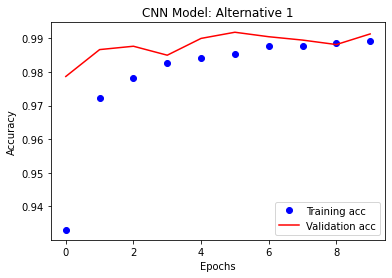

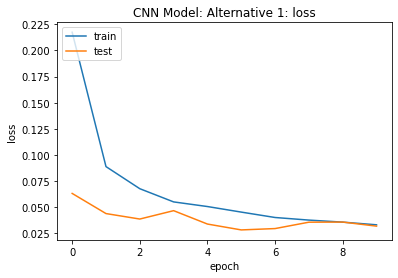

In [84]:
#plot of training accuracy versus validation accuracy
acc = param_alt_2.history['acc']
val_acc = param_alt_2.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("CNN Model: Alternative 1")
plt.legend()
plt.show()

#summarize history for loss
plt.plot(param_alt_2.history['loss'])
plt.plot(param_alt_2.history['val_loss'])
plt.title('CNN Model: Alternative 1: loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Alternate Model 2: Additional Convolution Layer

In [87]:
#Alternate 2 CNN Model
alt2_model = Sequential()

alt2_model.add(Input(shape=(28,28,1)))
alt2_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
alt2_model.add(MaxPooling2D((2,2)))
alt2_model.add(Conv2D(64, (3,3), activation='relu'))
alt2_model.add(MaxPooling2D((2,2)))
alt2_model.add(Dropout(0.5))
alt2_model.add(Conv2D(64, (3,3), activation='relu'))
alt2_model.add(MaxPooling2D((2,2)))
alt2_model.add(Flatten())
alt2_model.add(Dropout(0.5))
alt2_model.add(Dense(10, activation='softmax'))

alt2_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 6, 6, 64)          0         
                                                                 
 conv2d_31 (Conv2D)          (None, 4, 4, 64)        

Epoch 1/10
844/844 [==============================] - 17s 19ms/step - loss: 1.9711 - acc: 0.6494 - val_loss: 0.2763 - val_acc: 0.9297
Epoch 2/10
844/844 [==============================] - 16s 19ms/step - loss: 0.4082 - acc: 0.8737 - val_loss: 0.1870 - val_acc: 0.9418
Epoch 3/10
844/844 [==============================] - 16s 19ms/step - loss: 0.2789 - acc: 0.9137 - val_loss: 0.1601 - val_acc: 0.9505
Epoch 4/10
844/844 [==============================] - 16s 19ms/step - loss: 0.2213 - acc: 0.9322 - val_loss: 0.0964 - val_acc: 0.9748
Epoch 5/10
844/844 [==============================] - 16s 19ms/step - loss: 0.1881 - acc: 0.9418 - val_loss: 0.0755 - val_acc: 0.9773
Epoch 6/10
844/844 [==============================] - 16s 19ms/step - loss: 0.1648 - acc: 0.9486 - val_loss: 0.0664 - val_acc: 0.9790
Epoch 7/10
844/844 [==============================] - 16s 19ms/step - loss: 0.1458 - acc: 0.9555 - val_loss: 0.0522 - val_acc: 0.9852
Epoch 8/10
844/844 [==============================] - 17s 20ms

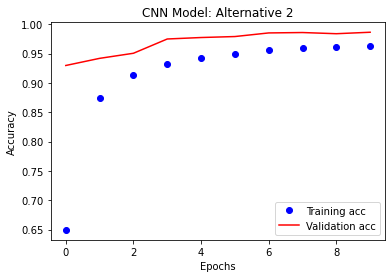

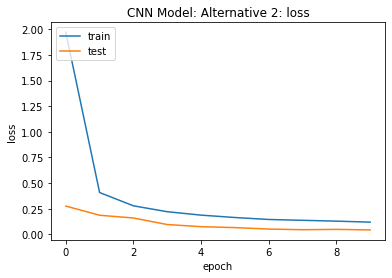

In [88]:
alt2_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

param_alt2 = alt2_model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_split=0.1)

#results: training accuracy: 0.9633, valildation accuracy: 0.9863

#plot of training accuracy versus validation accuracy
acc = param_alt2.history['acc']
val_acc = param_alt2.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("CNN Model: Alternative 2")
plt.legend()
plt.show()
                            
#summarize history for loss
plt.plot(param_alt2.history['loss'])
plt.plot(param_alt2.history['val_loss'])
plt.title('CNN Model: Alternative 2: loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Alternate Model 3: Additional Dense and Dropout Layer

In [89]:
#Alternative 3 CNN Model
alt3_model = Sequential()

alt3_model.add(Input(shape=(28,28,1)))
alt3_model.add(Conv2D(32, (3,3), activation='relu'))
alt3_model.add(MaxPooling2D((2,2)))
alt3_model.add(Conv2D(64, (3,3), activation='relu'))
alt3_model.add(MaxPooling2D((2,2)))
alt3_model.add(Flatten())
alt3_model.add(Dropout(0.5))
alt3_model.add(Dense(20, activation='relu'))
alt3_model.add(Dropout(0.5))
alt3_model.add(Dense(10, activation='softmax'))

alt3_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_17 (Dropout)        (None, 1600)            

Epoch 1/10
844/844 [==============================] - 13s 15ms/step - loss: 2.4657 - acc: 0.1207 - val_loss: 2.7008 - val_acc: 0.0118
Epoch 2/10
844/844 [==============================] - 12s 14ms/step - loss: 2.1614 - acc: 0.1740 - val_loss: 2.8126 - val_acc: 0.0038
Epoch 3/10
844/844 [==============================] - 12s 14ms/step - loss: 2.0249 - acc: 0.2178 - val_loss: 2.8438 - val_acc: 0.0035
Epoch 4/10
844/844 [==============================] - 12s 14ms/step - loss: 1.9274 - acc: 0.2482 - val_loss: 2.8146 - val_acc: 0.0033
Epoch 5/10
844/844 [==============================] - 12s 15ms/step - loss: 1.8603 - acc: 0.2724 - val_loss: 2.7917 - val_acc: 0.0282
Epoch 6/10
844/844 [==============================] - 12s 14ms/step - loss: 1.7844 - acc: 0.3091 - val_loss: 2.4189 - val_acc: 0.2135
Epoch 7/10
844/844 [==============================] - 12s 14ms/step - loss: 1.4519 - acc: 0.4656 - val_loss: 1.3378 - val_acc: 0.3208
Epoch 8/10
844/844 [==============================] - 12s 15ms

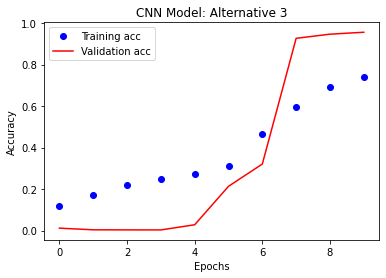

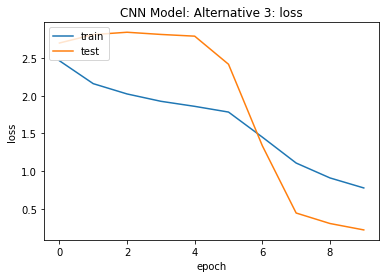

In [90]:
alt3_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

param_alt3 = alt3_model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_split=0.1)

#results: training accuracy: 0.7388, valildation accuracy: 0.9560

#plot of training accuracy versus validation accuracy
acc = param_alt3.history['acc']
val_acc = param_alt3.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("CNN Model: Alternative 3")
plt.legend()
plt.show()
                            
#summarize history for loss
plt.plot(param_alt3.history['loss'])
plt.plot(param_alt3.history['val_loss'])
plt.title('CNN Model: Alternative 3: loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evauluate Final Model
Model is trained using entire training set this time

In [102]:
#Best Model: Alternate 1 CNN Model
cnn_final = Sequential()

cnn_final.add(Input(shape=(28,28,1)))
cnn_final.add(Conv2D(32, (3,3), activation='relu'))
cnn_final.add(MaxPooling2D((2,2)))
cnn_final.add(Conv2D(64, (3,3)))
cnn_final.add(BatchNormalization())
cnn_final.add(Activation("relu"))
cnn_final.add(MaxPooling2D((2,2)))
cnn_final.add(Flatten())
cnn_final.add(Dropout(0.5))
cnn_final.add(Dense(10, activation='softmax'))

cnn_final.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_8 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 5, 5, 64)        

In [103]:
cnn_final.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

param_final = cnn_final.fit(X_train, Y_train, batch_size=32, epochs=10)

#results: training accuracy: 0.9902

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2014 - acc: 0.9371
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0818 - acc: 0.9746
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0630 - acc: 0.9803
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0561 - acc: 0.9826
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0472 - acc: 0.9849
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0432 - acc: 0.9865
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0386 - acc: 0.9874
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0355 - acc: 0.9886
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0336 - acc: 0.9894
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0292 - acc: 0.9902


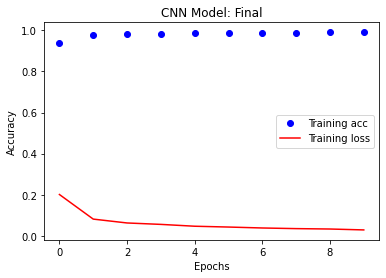

In [106]:
#plot of training accuracy versus validation accuracy
acc_final = param_final.history['acc']
loss = param_final.history['loss']
epochs = range(len(acc))
labels = ['Training acc', 'Training loss']

plt.plot(epochs, acc_final, 'bo', loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("CNN Model: Final")
plt.legend(labels)
plt.show()

In [107]:
#evaluation of final model
loss_and_acc = cnn_final.evaluate(X_test, Y_test)
print('Loss:', round(loss_and_acc[0],4))
print('Accuracy:', round(loss_and_acc[1],4))

313/313 [==============================] - 1s 3ms/step - loss: 0.0239 - acc: 0.9931
Loss: 0.0239
Accuracy: 0.9931
